In [7]:
import numpy as np
from scipy.stats import sem

# import my functions
# import info_theory_functions as info
from lnl_model_functions import *
from atick_redlich_functions import *
from get_davids_data import *
from image_processing_functions import *

# from scipy.optimize import minimize
# from scipy import fft, arange
# from random import randint
# from cmath import polar
# from numpy.fft import fft2
# from numpy.fft import fftshift
# from sklearn.decomposition import PCA
# from scipy.interpolate import interp1d
from scipy.optimize import curve_fit, minimize
from scipy.stats import sem
from scipy.interpolate import interp1d


# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
from matplotlib.pyplot import *

# note that nonposx(y) for log plots will no longer work with this package
# I recommend against enabling the whole notebook, since some plots come out funny.
# Instead, just use mpld3.display() at the end of cells you want to interact with.
import mpld3
#mpld3.enable_notebook()

from pylab import rcParams
rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Import natural images

In [5]:
# choose an image path from cd13A (flood plain, water, horizon) or cd01A (baboons, trees, bushes)
im_path     = '/Users/lmcintosh/data/images/Tkacik/cd13A' # flood plain, water, horizon
num_images  = 100
patch_size  = None
pixelsToDeg = 92./2 # or 2./92 degrees per pixel (spacing)
spacing     = 1./pixelsToDeg # number of degree spacing between pixels
normalize   = 'divisive'
contrast    = 0.35
patches     = load_images(im_path, num_images, patch_size, square=True, 
                          normalize=normalize, effective_contrast=contrast)

Only 78 files in directory.


In [6]:
allRot  = [spectrum2d(p,spacing=spacing,frequencyFlag=False) for p in patches]
specRot = np.mean(allRot, axis=0) # average out the amplitude spectrum over all images
frqRot, tmp = spectrum2d(patches[0],spacing=spacing,frequencyFlag=True)
error = [sem([allRot[j][i] for j in range(len(patches))]) for i in range(len(frqRot))]
originalSpectra = specRot
originalErrors  = error
originalFreqs   = frqRot

# Ideal curve with full model

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.43022183525e-07.


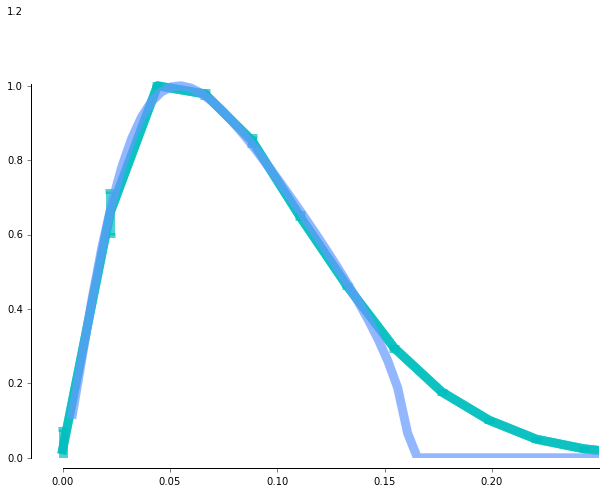

In [8]:
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=7.7844, surround_weighting=.5085,
                                                                     horz_weighting=.223, ama_weighting=1.165,
                                                                     center_width=1.86945,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                                       statistics=True)

# Ideal curve with horizontal cell model

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 3.0147009994e-07.


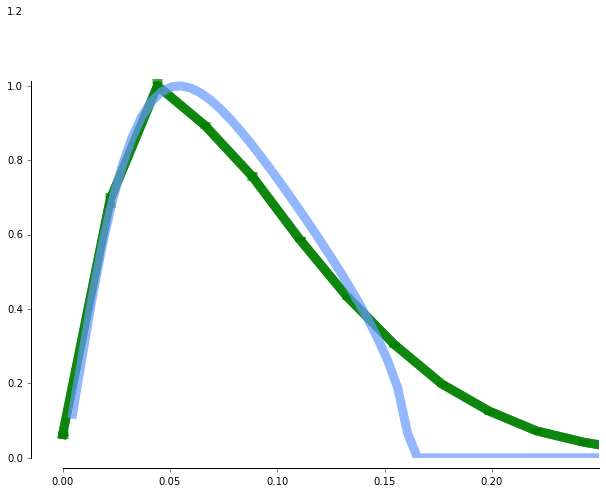

In [78]:
freq_ideal, filt_ideal, freq_expt_h, filt_expt_h, h_freqs, h_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=6., surround_weighting=.45,
                                                                     horz_weighting=.85, ama_weighting=0.,
                                                                     center_width=1.7,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                     aggregateColor='g', statistics=True)

# Ideal curve with amacrine cell model

The relative error from this choice of Lagrangian multiplier is 2.52828918319e-08.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


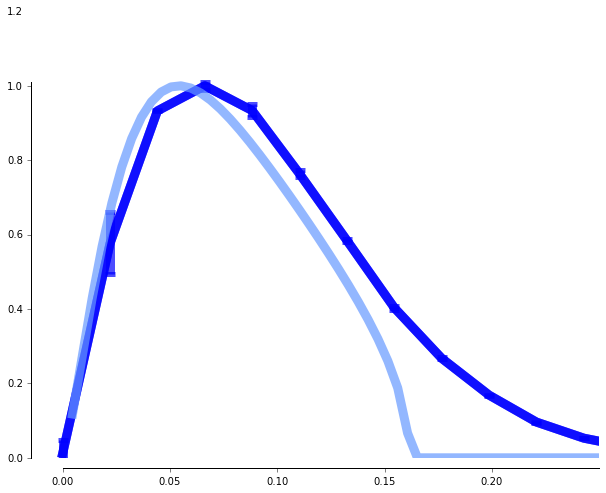

In [10]:
freq_ideal, filt_ideal, freq_expt_a, filt_expt_a, a_freqs, a_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=6., surround_weighting=.45,
                                                                     horz_weighting=0., ama_weighting=1.5,
                                                                     center_width=1.7,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                     aggregateColor='b', statistics=True)

# All of these overlaid

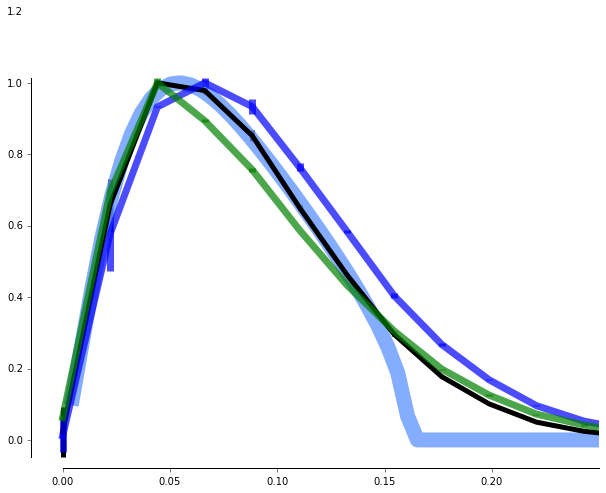

In [12]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='#6699ff', linewidth=15, alpha=0.8)
plt.errorbar(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), yerr=sem(both_ffts/np.nanmax(filt_expt_both)), 
             color='k', linewidth=5, alpha=1.0, capthick=5, capsize=0)
plt.errorbar(freq_expt_a, filt_expt_a/np.nanmax(filt_expt_a), yerr=sem(a_ffts/np.nanmax(filt_expt_a)),
            color='b', alpha=0.7, linewidth=7, capthick=5, capsize=0)
plt.errorbar(freq_expt_h, filt_expt_h/np.nanmax(filt_expt_h), yerr=sem(h_ffts/np.nanmax(filt_expt_h)),
            color='g', alpha=0.7, linewidth=7, capthick=5, capsize=0)
plt.xlim([-0.01,0.25])
plt.ylim([-0.05, 1.2])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.savefig('Fig4B-C_one_plot.pdf', fonttype=42)

# Signal

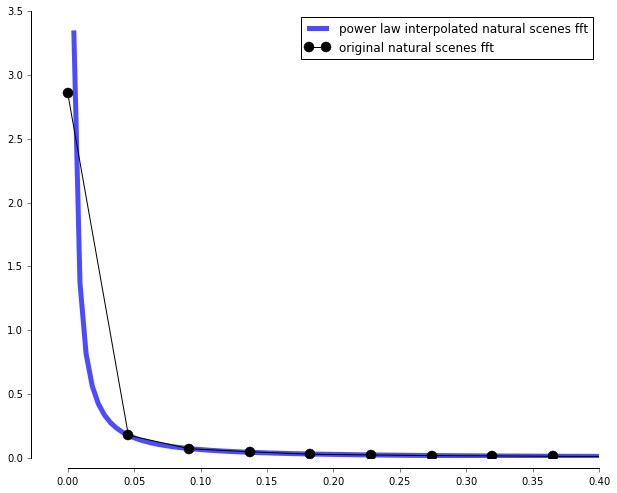

In [13]:
# interpolate signal amplitude
# power law
def func(x, a, b):
    return a/(x**b) # adding a constant tends to make moreSpectra have negative numbers
popt, pcov  = curve_fit(func, originalFreqs[1:], originalSpectra[1:])
more_signal_freq   = np.linspace(0., originalFreqs[-1], 5000)[1:]
more_signal_amp = func(more_signal_freq, *popt)

plt.plot(more_signal_freq, more_signal_amp, 'b', linewidth=5, alpha=0.7, label='power law interpolated natural scenes fft')
plt.plot(originalFreqs, originalSpectra, 'k.-', markersize=20, label='original natural scenes fft')
plt.legend()
plt.xlim([-0.02,0.4])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])

# Find constants to ensure output variance of interpoalted filters are identical

In [24]:
input_noise = 0.12
output_noise = 0.35

In [65]:
model_const = 0.905
a_const = 0.84
h_const = 0.9

In [47]:
filt_ideal/np.nanmax(filt_ideal)

array([ 0.11766971,  0.27450415,  0.42973935, ...,  0.        ,
        0.        ,  0.        ])

In [48]:
np.min(np.array(more_signal_freq) == np.array(freq_ideal))

True

## Variances

In [49]:
output_variance = np.sum((more_signal_amp*filt_ideal/np.nanmax(filt_ideal))**2 +
                          (input_noise * filt_ideal/np.nanmax(filt_ideal))**2 +
                          (output_noise)**2)
print(output_variance)

613.601287885


In [50]:
ideal_filter_interp = interp1d(freq_ideal, filt_ideal/np.nanmax(filt_ideal), kind='slinear')
output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(output_variance)

613.601287885


In [87]:
# model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(model_variance)

613.45753196


In [88]:
# a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(a_variance)

613.172542809


In [89]:
# h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(h_variance)

613.615126339


### Information

In [90]:
ideal_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*ideal_filter_interp(more_signal_freq))**2)/((input_noise*ideal_filter_interp(more_signal_freq))**2 + output_noise**2)))
print(ideal_info)

4.12362903341


In [91]:
model_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*model_const*model_interp(more_signal_freq))**2)/((input_noise*model_const*model_interp(more_signal_freq))**2 + output_noise**2)))
print(model_info)

3.70432562792


In [92]:
a_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*a_const*a_interp(more_signal_freq))**2)/((input_noise*a_const*a_interp(more_signal_freq))**2 + output_noise**2)))
print(a_info)

2.79462805107


In [93]:
h_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*h_const*h_interp(more_signal_freq))**2)/((input_noise*h_const*h_interp(more_signal_freq))**2 + output_noise**2)))
print(h_info)

4.07137440643


### Why is the horizontal cell model have such relatively high information??

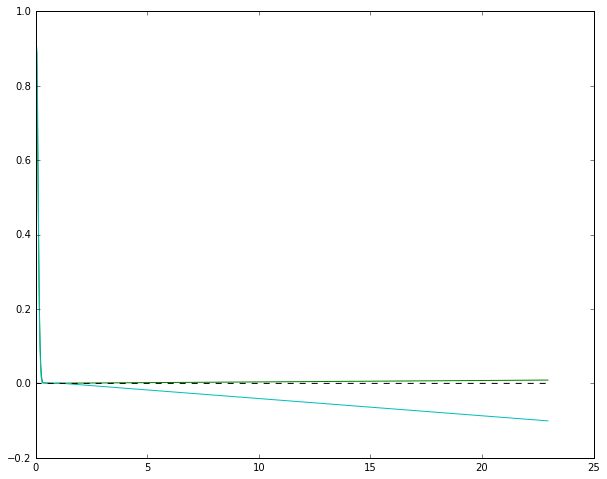

In [86]:
plt.plot(more_signal_freq, h_const * h_interp(more_signal_freq), 'g')
plt.plot(more_signal_freq, model_const * model_interp(more_signal_freq), 'c')
# plt.plot(more_signal_freq, ideal_filter_interp(more_signal_freq), 'k')
plt.plot(more_signal_freq, len(more_signal_freq)*[0.0], 'k--')

## Well there is a problem!  
Need to ensure all points are $\geq$ 0

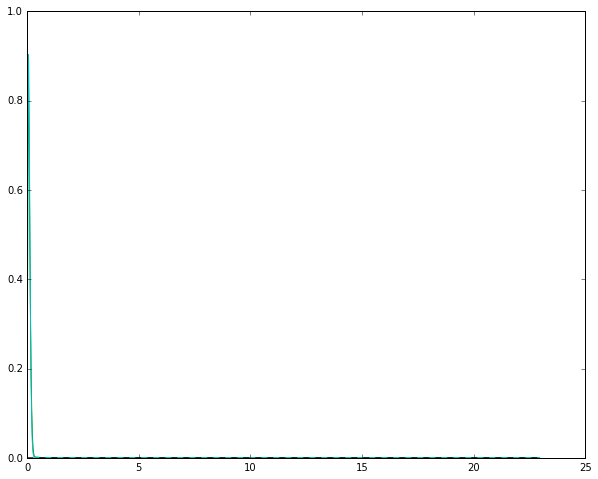

In [94]:
plt.plot(more_signal_freq, h_const * h_interp(more_signal_freq), 'g')
plt.plot(more_signal_freq, model_const * model_interp(more_signal_freq), 'c')
# plt.plot(more_signal_freq, ideal_filter_interp(more_signal_freq), 'k')
plt.plot(more_signal_freq, len(more_signal_freq)*[0.0], 'k--')

## Even with slinear interpolation filling all new values to 0.0 results in very similar information levels, with horizontal cell model still higher than model

(0, 1)

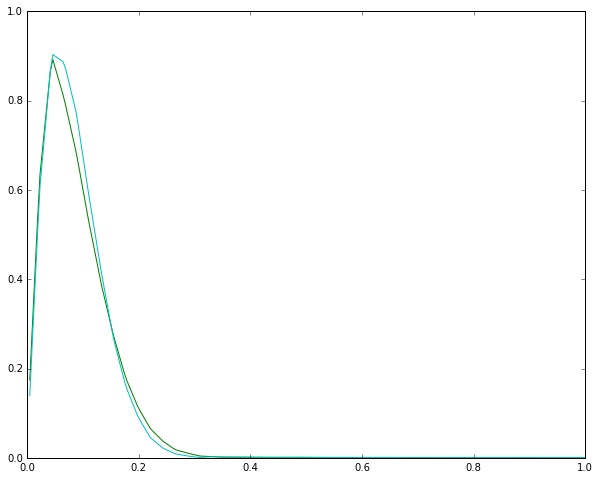

In [95]:
plt.plot(more_signal_freq, h_const * h_interp(more_signal_freq), 'g')
plt.plot(more_signal_freq, model_const * model_interp(more_signal_freq), 'c')
# plt.plot(more_signal_freq, ideal_filter_interp(more_signal_freq), 'k')
plt.plot(more_signal_freq, len(more_signal_freq)*[0.0], 'k--')
plt.xlim([0,1])

## Still missing some significant power at low frequency. Try sampling frequencies at higher number

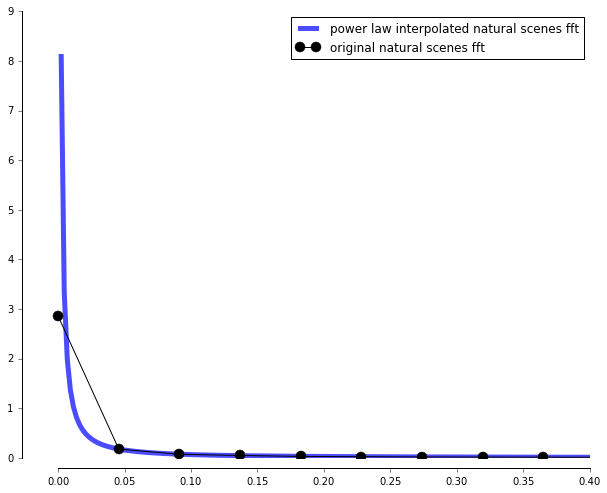

In [96]:
# interpolate signal amplitude
# power law
npoints = 10000
popt, pcov  = curve_fit(func, originalFreqs[1:], originalSpectra[1:])
more_signal_freq   = np.linspace(0., originalFreqs[-1], npoints)[1:]
more_signal_amp = func(more_signal_freq, *popt)

plt.plot(more_signal_freq, more_signal_amp, 'b', linewidth=5, alpha=0.7, label='power law interpolated natural scenes fft')
plt.plot(originalFreqs, originalSpectra, 'k.-', markersize=20, label='original natural scenes fft')
plt.legend()
plt.xlim([-0.02,0.4])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])

In [98]:
more_signal_freq[0]

0.0022956660745439626

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.30487542266e-07.


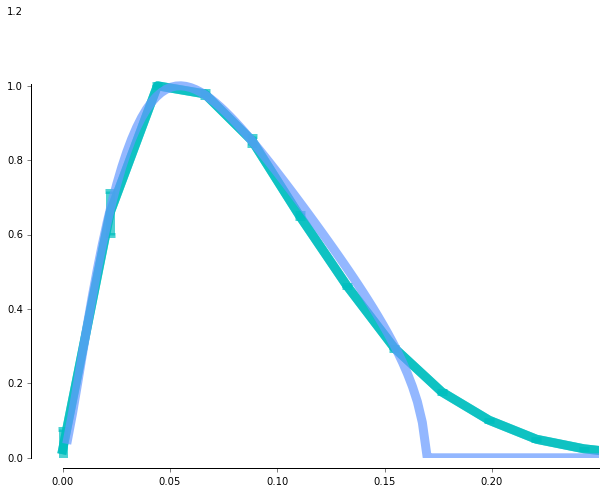

In [99]:
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=7.7844, surround_weighting=.5085,
                                                                     horz_weighting=.223, ama_weighting=1.165,
                                                                     center_width=1.86945,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                                       statistics=True)

In [143]:
model_const = 0.927
a_const = 1.02
h_const = 0.81

In [101]:
ideal_filter_interp = interp1d(freq_ideal, filt_ideal/np.nanmax(filt_ideal), kind='slinear')
output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(output_variance)

1227.44817883


In [128]:
# model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(model_variance)

1227.44603828


In [144]:
# a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(a_variance)

1227.4460618


In [116]:
# h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='linear', 
#                         fill_value="extrapolate", bounds_error=False)
h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(h_variance)

1227.41697552


## Interesting how much the model constants for equitable variance depend on the frequency range

In [145]:
ideal_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*ideal_filter_interp(more_signal_freq))**2)/((input_noise*ideal_filter_interp(more_signal_freq))**2 + output_noise**2)))
print(ideal_info)

8.62305345843


In [146]:
model_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*model_const*model_interp(more_signal_freq))**2)/((input_noise*model_const*model_interp(more_signal_freq))**2 + output_noise**2)))
print(model_info)

8.35567816287


In [147]:
a_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*a_const*a_interp(more_signal_freq))**2)/((input_noise*a_const*a_interp(more_signal_freq))**2 + output_noise**2)))
print(a_info)

8.18913162676


In [148]:
h_info = np.sum(0.5*np.log2(1+ ((more_signal_amp*h_const*h_interp(more_signal_freq))**2)/((input_noise*h_const*h_interp(more_signal_freq))**2 + output_noise**2)))
print(h_info)

7.85881538592


## We really want to investigate the low frequency regime where the model filters are most different, and where the divergence from the ideal filter won't be as large  

We don't need to change the interpolations

In [153]:
cutoff_freq = 0.4
lower_freqs = np.array([f for f in more_signal_freq if f <= cutoff_freq])
lower_amps = np.array([a for ida,a in enumerate(more_signal_amp) if more_signal_freq[ida] <= cutoff_freq])
print('%d total freqs' %(len(lower_freqs)))
print('%d total amplitudes' %(len(lower_amps)))

174 total freqs
174 total amplitudes


In [154]:
output_variance = np.sum((lower_amps*ideal_filter_interp(lower_freqs))**2 +
                          (input_noise * ideal_filter_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(output_variance)

23.8856788259


In [155]:
model_variance = np.sum((lower_amps*model_const*model_interp(lower_freqs))**2 +
                          (input_noise * model_const * model_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(model_variance)

23.8835361446


In [156]:
a_variance = np.sum((lower_amps*a_const*a_interp(lower_freqs))**2 +
                          (input_noise * a_const * a_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(a_variance)

23.8835585794


In [157]:
h_variance = np.sum((lower_amps*h_const*h_interp(lower_freqs))**2 +
                          (input_noise * h_const * h_interp(lower_freqs))**2 +
                          (output_noise)**2)
print(h_variance)

23.8544737247


### infos

In [158]:
ideal_info = np.sum(0.5*np.log2(1+ ((lower_amps*ideal_filter_interp(lower_freqs))**2)/((input_noise*ideal_filter_interp(lower_freqs))**2 + output_noise**2)))
print(ideal_info)

8.62305345843


In [159]:
model_info = np.sum(0.5*np.log2(1+ ((lower_amps*model_const*model_interp(lower_freqs))**2)/((input_noise*model_const*model_interp(lower_freqs))**2 + output_noise**2)))
print(model_info)

8.35567811554


In [160]:
a_info = np.sum(0.5*np.log2(1+ ((lower_amps*a_const*a_interp(lower_freqs))**2)/((input_noise*a_const*a_interp(lower_freqs))**2 + output_noise**2)))
print(a_info)

8.18913156271


In [161]:
h_info = np.sum(0.5*np.log2(1+ ((lower_amps*h_const*h_interp(lower_freqs))**2)/((input_noise*h_const*h_interp(lower_freqs))**2 + output_noise**2)))
print(h_info)

7.8588153459


## An interesting way to plot this might be to have a cumulative information plot, so that we can see the both the frequencies at which the information rate changes, and the absolute information difference

In [162]:
input_noise

0.12

In [163]:
output_noise

0.35

In [166]:
def info_at_freq(freqs, signal_amplitude, filter_interpolation_function, function_const=1., input_noise=0.12, output_noise=0.35):
    numerator = (signal_amplitude * function_const * filter_interpolation_function(freqs))**2
    denominator = ((input_noise * function_const * filter_interpolation_function(freqs))**2 + output_noise**2)
    return 0.5*np.log2(1 + (numerator/denominator))

In [167]:
cuminfo_ideal = info_at_freq(lower_freqs, lower_amps, ideal_filter_interp)
cuminfo_model = info_at_freq(lower_freqs, lower_amps, model_interp, function_const=model_const)
cuminfo_a = info_at_freq(lower_freqs, lower_amps, a_interp, function_const=a_const)
cuminfo_h = info_at_freq(lower_freqs, lower_amps, h_interp, function_const=h_const)

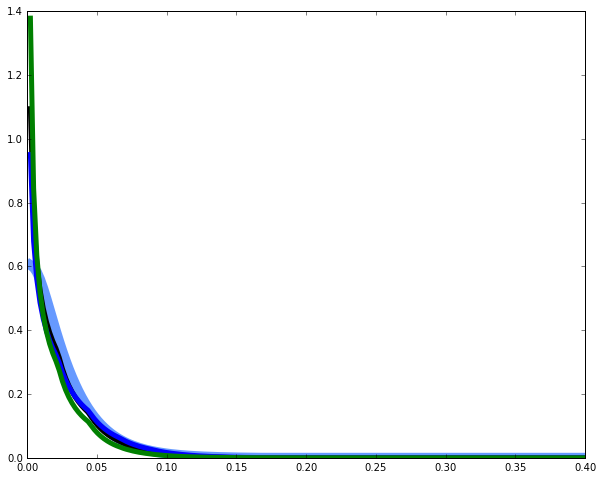

In [170]:
plt.plot(lower_freqs, cuminfo_ideal, color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, cuminfo_model, color='k', linewidth=5, label='model')
plt.plot(lower_freqs, cuminfo_a, color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, cuminfo_h, color='g', linewidth=5, label='horizontal')

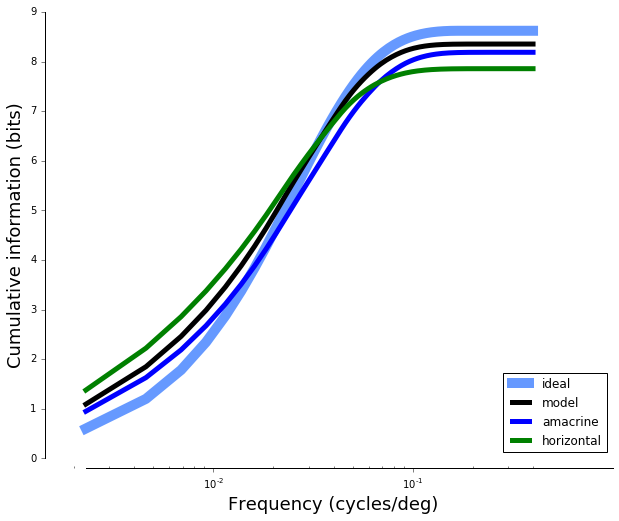

In [194]:
plt.plot(lower_freqs, np.cumsum(cuminfo_ideal), color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, np.cumsum(cuminfo_model), color='k', linewidth=5, label='model')
plt.plot(lower_freqs, np.cumsum(cuminfo_a), color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, np.cumsum(cuminfo_h), color='g', linewidth=5, label='horizontal')
plt.xlabel('Frequency (cycles/deg)', fontsize=18)
plt.ylabel('Cumulative information (bits)', fontsize=18)
plt.legend(loc='lower right')
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
plt.xscale('log')
plt.xlim([1.6*10e-4, 10e-1])
adjust_spines(plt.gca(), ['left', 'bottom'])

## Increase points to get higher resolution

The relative error from this choice of Lagrangian multiplier is 8.14995764308e-08.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


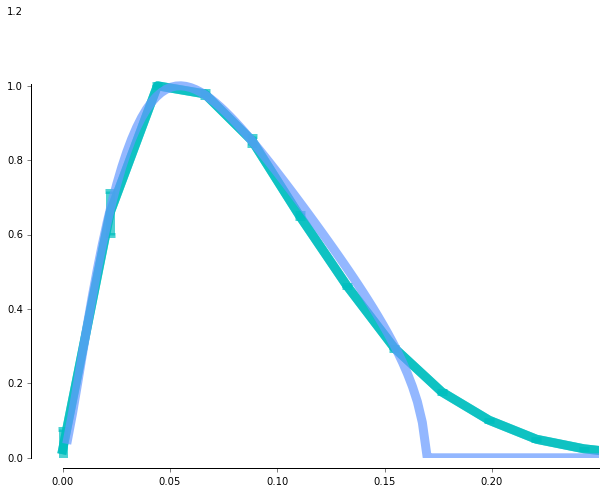

In [199]:
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=7.7844, surround_weighting=.5085,
                                                                     horz_weighting=.223, ama_weighting=1.165,
                                                                     center_width=1.86945,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                                       statistics=True)

## Use function for finding the ideal model without specifying the weightings

(0, 0.4)

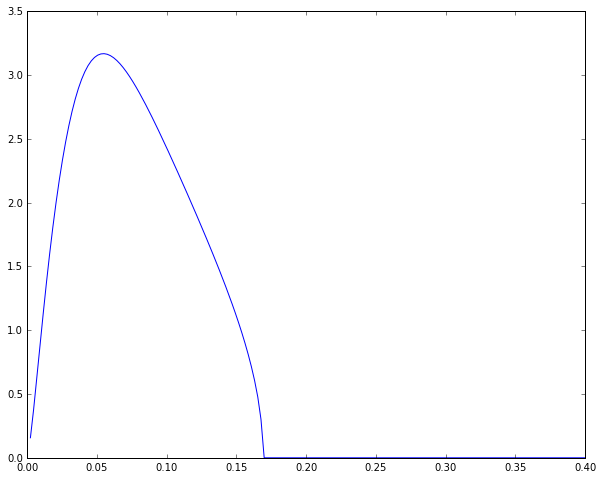

In [221]:
plt.plot(freq_ideal, filt_ideal)
plt.xlim([0,0.4])

In [230]:
freqs, ideal_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(freq_ideal, filt_ideal, returnFlag='all')

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


In [231]:
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is -0.518264, Amacrine weight is 2.115199
Center weight is 7.647870, Surround weight is 0.248688
Center is 1.166699 std wide


(0, 0.4)

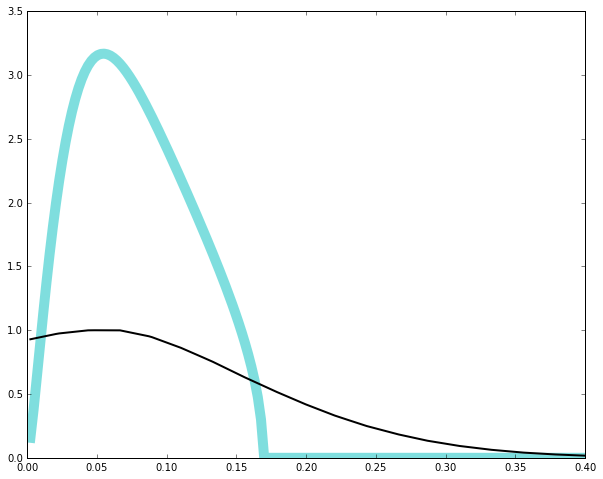

In [232]:
plt.plot(freq_ideal, filt_ideal, color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, ideal_fft, 'k', linewidth=2)
plt.xlim([0,.4])

In [237]:
np.max(lower_freqs)

0.39944589697064947

In [599]:
lowerer_freqs = [f for f in lower_freqs if f < 0.25]
freqs, model_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is -0.075047, Amacrine weight is 1.268475
Center weight is 5.482942, Surround weight is 0.439658
Center is 2.032814 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


(0, 0.4)

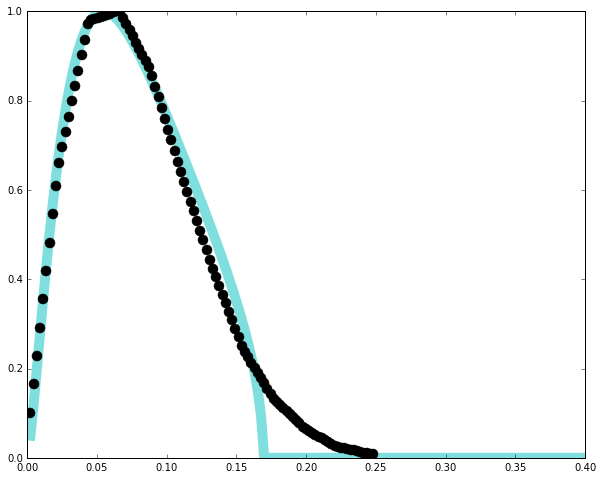

In [600]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=20)
plt.xlim([0,.4])

In [309]:
lowerer_freqs = [f for f in lower_freqs if f < 0.15]
freqs, ideal_fft, center_weight, surround_weight, center_width = fit_ideal_horz_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
print('Horizontal weight is %f, Amacrine weight is %f' %(1.0, 0.0))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is 1.000000, Amacrine weight is 0.000000
Center weight is -4293.667490, Surround weight is -324.616352
Center is 1.499641 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:700: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


(0, 0.4)

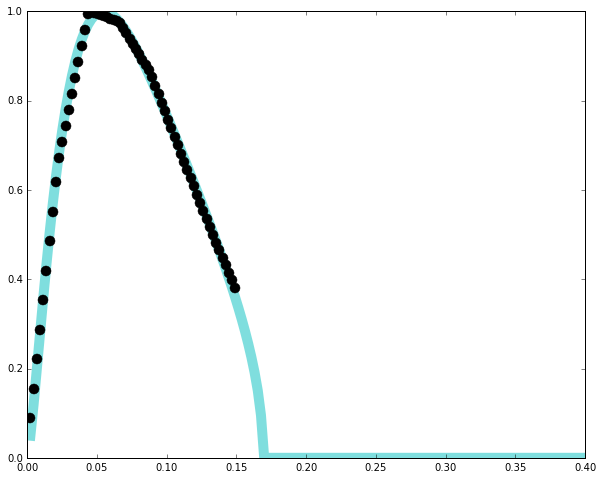

In [310]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=20)
plt.xlim([0,.4])

In [311]:
lowerer_freqs = [f for f in lower_freqs if f < 0.15]
freqs, ideal_fft, center_weight, surround_weight, center_width = fit_ideal_ama_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
print('Horizontal weight is %f, Amacrine weight is %f' %(0.0, 1.0))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is 0.000000, Amacrine weight is 1.000000
Center weight is 3006.352512, Surround weight is 291.468208
Center is 1.896491 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:758: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_freqs_one_sided = np.linspace(0, 1./(2*spacing), len(rf_f_one_sided))


(0, 0.4)

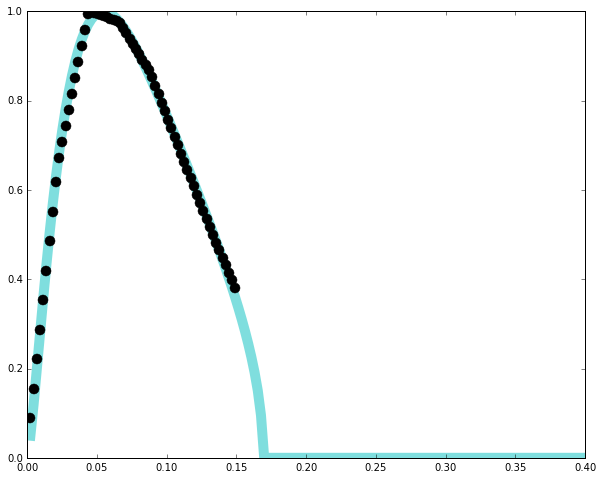

In [312]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=20)
plt.xlim([0,.4])

The relative error from this choice of Lagrangian multiplier is 2.14200077084e-07.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


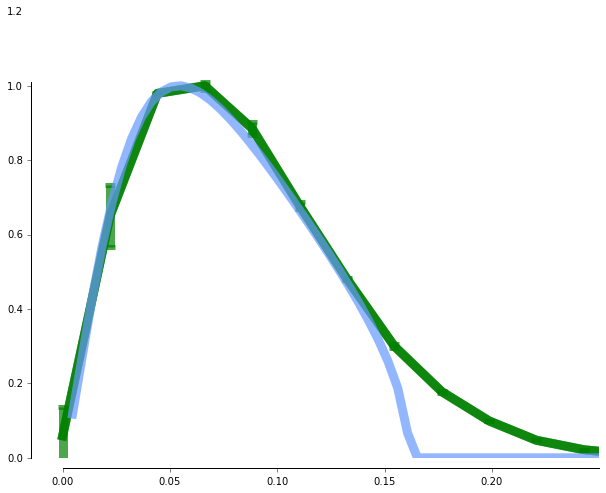

In [313]:
freq_ideal, filt_ideal, freq_expt_h, filt_expt_h, h_freqs, h_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=3006.352512, surround_weighting=291.468208,
                                                                     horz_weighting=0.0, ama_weighting=1.0,
                                                                     center_width=1.896491,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=5000, plotFlag='aggregate',
                                                                     aggregateColor='g', statistics=True)

# Okay, so my previous curve-fitting procedure was not the best. When I use curve_fit, I can obtain a pretty-close curve with only one inhibitory cell-type. What happens if I fix the center width?

In [329]:
ganglion_rfs = load_ganglion_cells()
interp_ganglions     = get_interp(ganglion_rfs, nPoints = 100, mode='valid')
aligned_ganglion_rfs = np.vstack([y for x,y in interp_ganglions])
valid_space          = interp_ganglions[0][0]

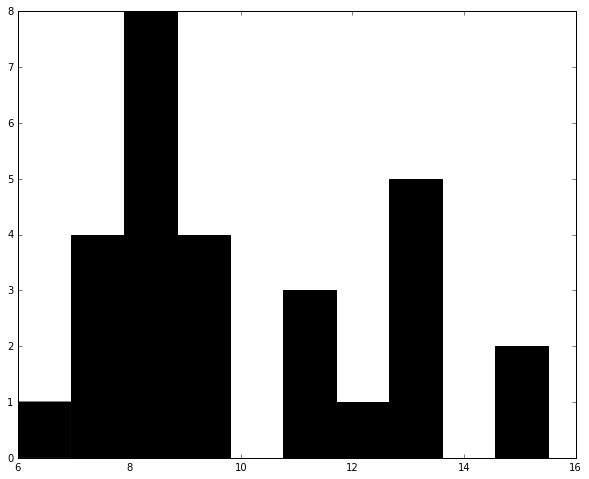

In [338]:
widths = []
for rf in aligned_ganglion_rfs:
    pos_inds = np.array([i for i in range(len(rf)) if rf[i] > 0])
    lefties  = 48 - pos_inds
    left_width  = np.min(lefties[lefties>=0])
    right_width = np.min(-lefties[lefties<0])
    #widths.append(np.min(abs(48 - pos_inds)))
    widths.append(np.mean([left_width, right_width]))
counts, bins, _ = hist(widths, color='k')

PCA(copy=True, n_components=3, whiten=False)

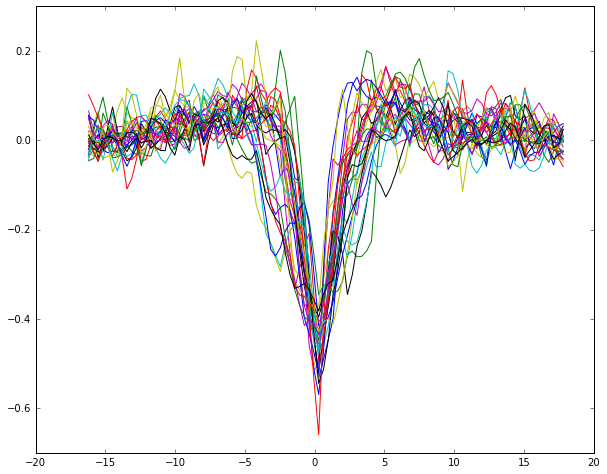

In [339]:
interp_ganglions     = get_interp(ganglion_rfs, nPoints = 100, mode='valid')
aligned_ganglion_rfs = np.vstack([y for x,y in interp_ganglions])
valid_space          = interp_ganglions[0][0]

plot(valid_space, aligned_ganglion_rfs.T)

pca = PCA(n_components=3)
pca.fit(aligned_ganglion_rfs)

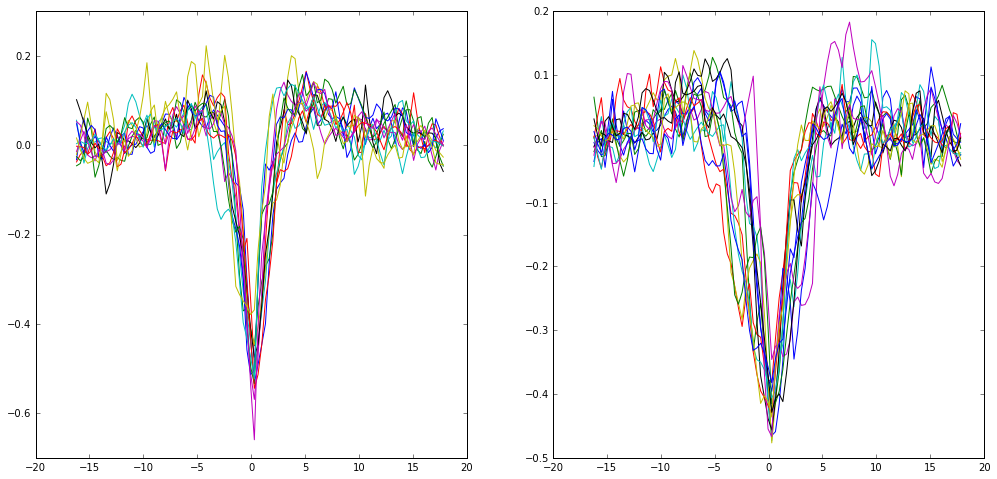

In [340]:
fig = gcf()
fig.set_size_inches((17,8))
subplot(1,2,1)
_ = plot(valid_space, aligned_ganglion_rfs[np.array(widths) < 9].T)
subplot(1,2,2)
_ = plot(valid_space, aligned_ganglion_rfs[np.array(widths) >= 9].T)

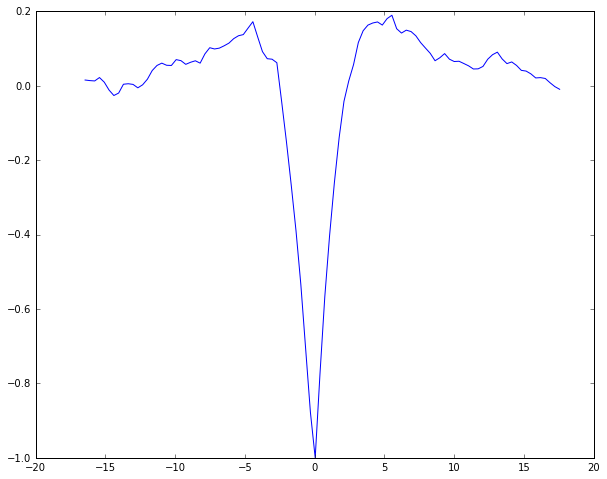

In [345]:
narrow_ganglions = aligned_ganglion_rfs[np.array(widths) < 9]
mean_narrow_ganglion = np.mean(narrow_ganglions, axis=0)
plot(valid_space-.25, mean_narrow_ganglion/np.max(abs(mean_narrow_ganglion)))
# plot(valid_space, diff_gaussians(valid_space, 1.3, 5, 3), 'k')
#plot(valid_space, gaussian(x=valid_space))

In [398]:
def diff_of_gaussians(space, center_width, surround_width, center_strength, surround_strength):
    center = gaussian(x=space, sigma=center_width, mu=0)
    surround = gaussian(x=space, sigma=surround_width, mu=0)
    difference = center_strength * center - surround_strength * surround
    return difference

In [399]:
popt, pcov = curve_fit(diff_of_gaussians, valid_space-.25, mean_narrow_ganglion, p0=[1.3, 7.4, -11, -60])

In [400]:
popt

array([  1.18498983,   7.39968434,  -4.60064203, -29.69700778])

In [401]:
difference = diff_of_gaussians(valid_space-.25, *popt)

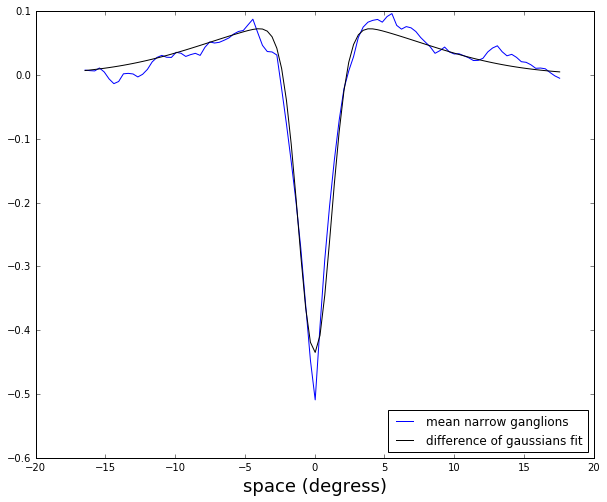

In [404]:
plot(valid_space-.25, mean_narrow_ganglion, label='mean narrow ganglions')
plot(valid_space-.25, difference, 'k', label='difference of gaussians fit')
plt.legend(loc='lower right')
plt.xlabel('space (degress)', fontsize=18)

## So the center width is 1.185 std (degrees)  
Try setting that center width and re-optimizing the model fits

In [537]:
lowerer_freqs = [f for f in lower_freqs if f < 0.17]
model_freqs, model_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), 
                                                                                                    center_width=1.751,
                                                                                                    returnFlag='all')
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

Horizontal weight is 1.154800, Amacrine weight is 2.473169
Center weight is 11.258985, Surround weight is 0.274643
Center is 1.751000 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


(0, 0.4)

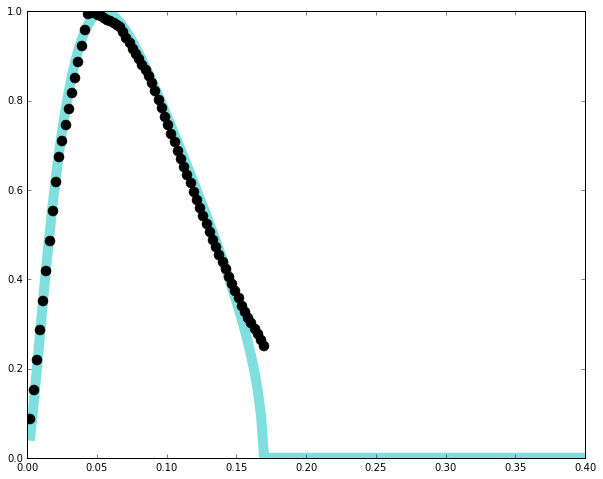

In [538]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(model_freqs, model_fft, 'k.', linewidth=2, markersize=20)
plt.xlim([0,.4])

In [454]:
difference = diff_of_gaussians(valid_space-.25, 1.751,   7.39968434,  -8.60064203, -50.69700778)

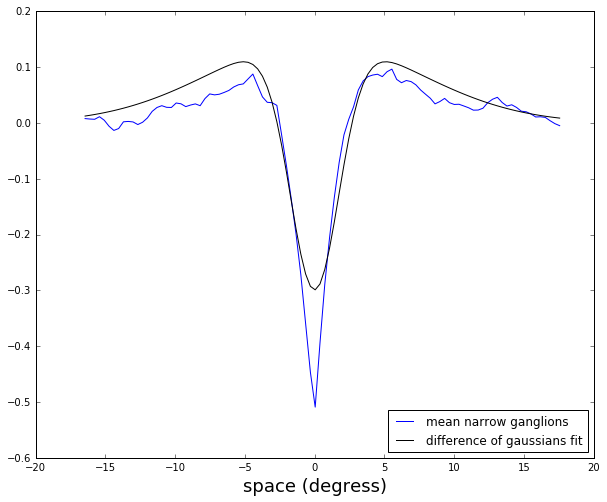

In [457]:
plot(valid_space-.25, mean_narrow_ganglion, label='mean narrow ganglions')
plot(valid_space-.25, difference, 'k', label='difference of gaussians fit')
plt.legend(loc='lower right')
plt.xlabel('space (degress)', fontsize=18)

In [476]:
def diff_of_gaussians_fixed_center(space, surround_width, center_strength, surround_strength):
    center = gaussian(x=space, sigma=1.751050, mu=0)
    surround = gaussian(x=space, sigma=surround_width, mu=0)
    difference = center_strength * center - surround_strength * surround
    return difference

In [458]:
popt, pcov = curve_fit(diff_of_gaussians_fixed_center, valid_space-.25, mean_narrow_ganglion, p0=[7.4, -11, -60])

In [459]:
difference = diff_of_gaussians_fixed_center(valid_space-.25, *popt)

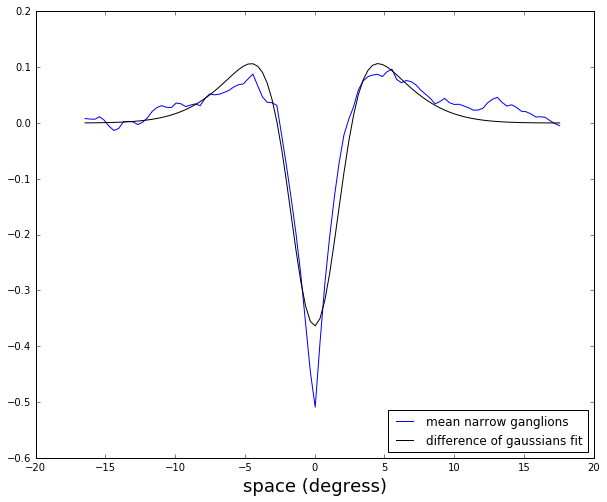

In [460]:
plot(valid_space-.25, mean_narrow_ganglion, label='mean narrow ganglions')
plot(valid_space-.25, difference, 'k', label='difference of gaussians fit')
plt.legend(loc='lower right')
plt.xlabel('space (degress)', fontsize=18)

# try using all ganglion cells, not just narrow ones.

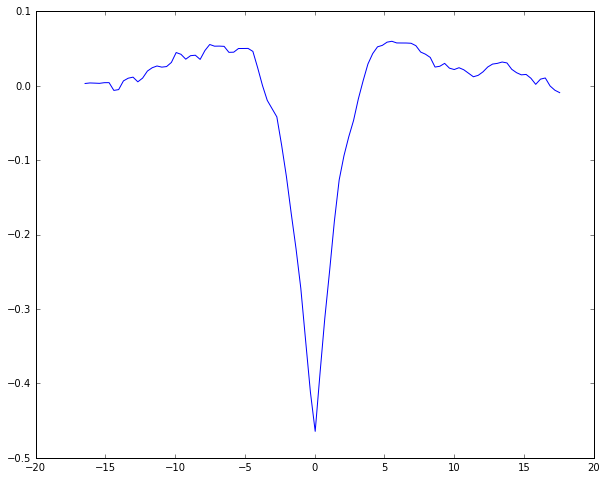

In [462]:
mean_ganglion = np.mean(aligned_ganglion_rfs, axis=0)
plot(valid_space-.25, mean_ganglion)
# plot(valid_space, diff_gaussians(valid_space, 1.3, 5, 3), 'k')
#plot(valid_space, gaussian(x=valid_space))

In [467]:
popt, pcov = curve_fit(diff_of_gaussians, valid_space-.25, mean_ganglion, p0=[1.75, 7.4, -11, -60])
popt

array([  1.47447981,   8.4366549 ,  -6.10617035, -25.77825393])

In [468]:
difference = diff_of_gaussians(valid_space-.25, *popt)

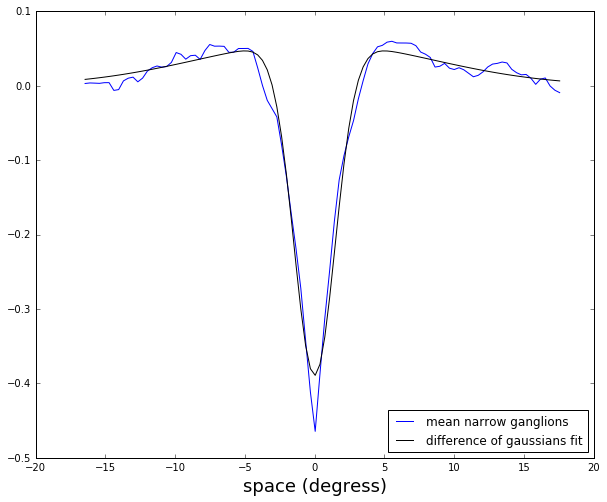

In [469]:
plot(valid_space-.25, mean_ganglion, label='mean narrow ganglions')
plot(valid_space-.25, difference, 'k', label='difference of gaussians fit')
plt.legend(loc='lower right')
plt.xlabel('space (degress)', fontsize=18)

In [477]:
popt, pcov = curve_fit(diff_of_gaussians_fixed_center, valid_space-.25, mean_ganglion, p0=[7.4, -11, -60])
popt

array([  6.64913424,  -8.65642742, -24.66967176])

In [478]:
difference = diff_of_gaussians_fixed_center(valid_space-.25, *popt)

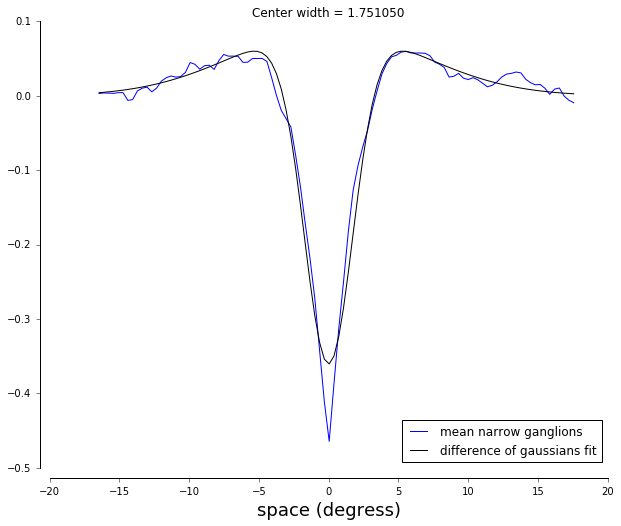

In [501]:
plot(valid_space-.25, mean_ganglion, label='mean narrow ganglions')
plot(valid_space-.25, difference, 'k', label='difference of gaussians fit')
plt.legend(loc='lower right')
plt.xlabel('space (degress)', fontsize=18)
plt.title('Center width = %f' %1.751050)
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])

In [551]:
lowerer_freqs = [f for f in lower_freqs if f < 0.17]
h_freqs, h_fft, center_weight, surround_weight, center_width = fit_ideal_horz_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), 
                                                                                                    center_width=1.751,
                                                                                                    returnFlag='all')
h_interp, h_popt = fit_ideal_horz_only(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=1.751050, returnFlag='interp')
print(h_popt)
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:706: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:706: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


[ 9.10274373  0.60078197]
Center weight is 8.688049, Surround weight is 0.573427
Center is 1.751000 std wide


(0, 0.4)

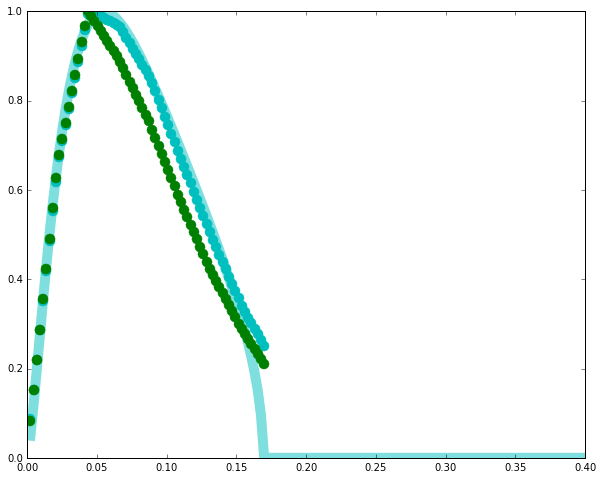

In [552]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(model_freqs, model_fft, 'c.', linewidth=2, markersize=20)
plt.plot(h_freqs, h_fft, 'g.', linewidth=2, markersize=20)
plt.xlim([0,.4])

In [559]:
lowerer_freqs = [f for f in lower_freqs if f < 0.17]
a_freqs, a_fft, center_weight, surround_weight, center_width = fit_ideal_ama_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), 
                                                                                                    center_width=1.751,
                                                                                                    returnFlag='all')
a_interp, a_popt = fit_ideal_ama_only(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=1.751050, returnFlag='interp')
print(a_popt)
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:770: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:770: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


[ 1.31364833  0.13197578]
Center weight is 5.023050, Surround weight is 0.514009
Center is 1.751000 std wide


(0, 1.1)

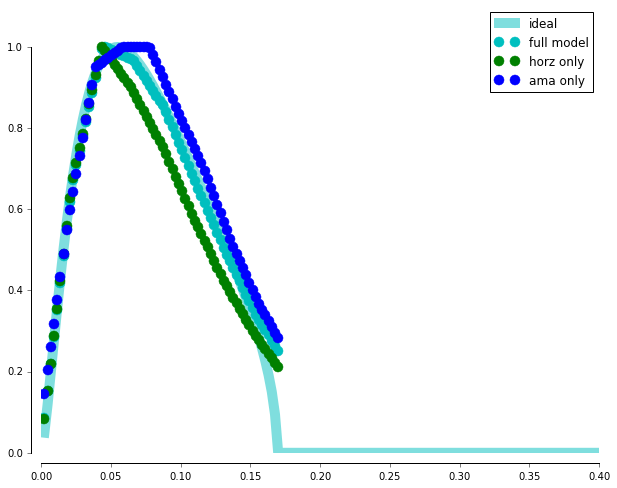

In [560]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5, label='ideal')
plt.plot(model_freqs, model_fft, 'c.', linewidth=2, markersize=20, label='full model')
plt.plot(h_freqs, h_fft, 'g.', linewidth=2, markersize=20, label='horz only')
plt.plot(a_freqs, a_fft, 'b.', linewidth=2, markersize=20, label='ama only')
plt.xlim([0,.4])
plt.legend()
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.ylim([0,1.1])

# Full filters with these popt values

In [514]:
def filter_model(horz_weight, ama_weight, center_weight, surround_weight, center_width=1.751050):
    # Get original data
    horz_pfs = get_horizontal_projective_field()
    ama_pfs  = get_amacrine_projective_field()

    # get means of the projective fields
    space_h, horz_pf, horz_sem = get_mean(horz_pfs)
    space_a, ama_pf, ama_sem   = get_mean(ama_pfs)

    # interpolate horz and ama to get a unified space; mode='valid'
    horz_interp = interp1d(space_h, horz_pf, kind='slinear')
    ama_interp  = interp1d(space_a, ama_pf, kind='slinear')
    space       = np.linspace(np.max([np.min(space_h), np.min(space_a)]), np.min([np.max(space_h), np.max(space_a)]), 100)

    # project interpolations on unified space
    horz_pf     = horz_interp(space)
    ama_pf      = ama_interp(space)

    # set sampling rate
    spacing = space[-1] - space[-2]

    # make surround
    surround = horz_weight * horz_pf + ama_weight * ama_pf

    # make center
    center = gaussian(x=space, sigma=center_width, mu=space[abs(surround)==np.max(abs(surround))]) # gaussian

    # put them together
    if len(center.shape) > 1:
        center = center.squeeze()
    rf = center_weight * center + surround_weight * surround

    # Amplitude Spectrum of RF
    rf_f_two_sided = abs(np.fft.fft(rf)) / np.prod(rf.shape)
    n = len(rf_f_two_sided)
    if n % 2 == 0:
        rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
    else:
        rf_f_one_sided = rf_f_two_sided[:(n-1)/2 + 1]
    rf_freqs_one_sided = np.linspace(0, 1./(2*spacing), len(rf_f_one_sided))

    rf_interp = interp1d(rf_freqs_one_sided, rf_f_one_sided, kind='slinear', fill_value=[0.0], bounds_error=False)
    
    return rf_interp

In [525]:
lowerer_freqs = [f for f in lower_freqs if f < 0.15]
freqs, model_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
model_interp, model_popt = fit_ideal(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=1.751050, returnFlag='interp')
print(model_popt)
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


[ 0.39447375  1.0793781   7.04900574  0.43458699]
Horizontal weight is 0.185486, Amacrine weight is 0.507533
Center weight is 4.063063, Surround weight is 0.532735
Center is 1.751050 std wide


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 0.4)

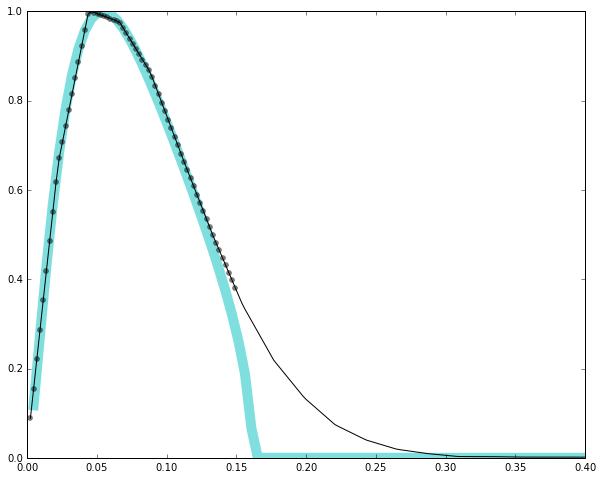

In [531]:
model_filter_interp = filter_model(*model_popt)
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=10, alpha=0.5)
plt.plot(lower_freqs, model_filter_interp(lower_freqs)/np.nanmax(model_filter_interp(lower_freqs)), 'k')
plt.xlim([0,.4])

## Rather than do this laborious interpolation, just plug popt values into the compare_to_experiment function

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.76350915577e-07.


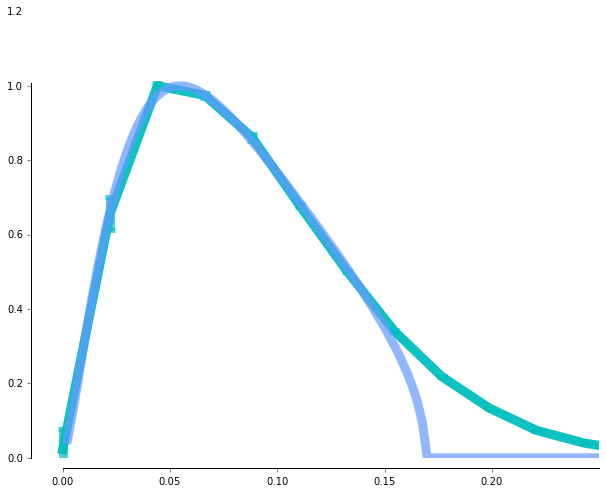

In [567]:
center_width = 1.751050
horz_weight, ama_weight, center_weight, surround_weight = model_popt
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=center_weight, surround_weighting=surround_weight,
                                                                     horz_weighting=horz_weight, ama_weighting=ama_weight,
                                                                     center_width=center_width,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                                       statistics=True)

The relative error from this choice of Lagrangian multiplier is 1.4379289496e-07.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


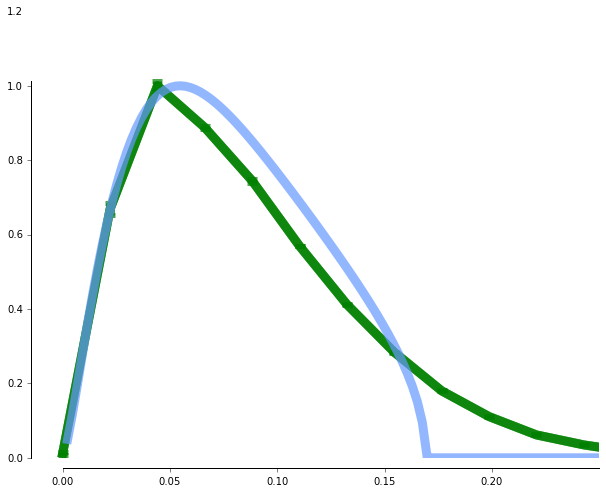

In [568]:
center_width = 1.751050
horz_weight = 1.0
ama_weight = 0.0
center_weight, surround_weight = h_popt
freq_ideal, filt_ideal, freq_expt_h, filt_expt_h, h_freqs, h_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=center_weight, surround_weighting=surround_weight,
                                                                     horz_weighting=1.0, ama_weighting=0.0,
                                                                     center_width=center_width,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                     aggregateColor='g', statistics=True)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.71545200411e-07.


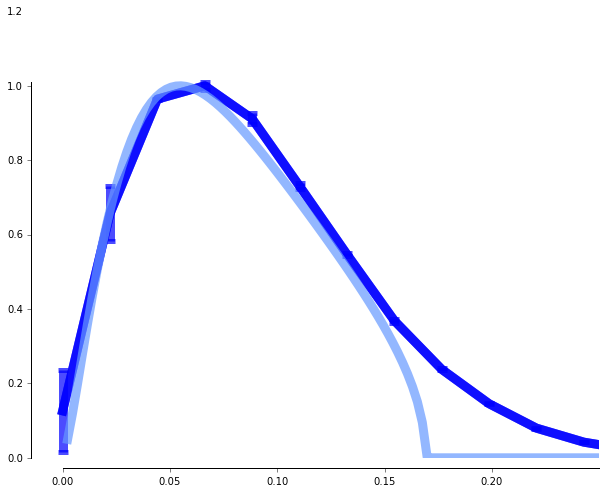

In [569]:
center_width = 1.751050
horz_weight = 0.0
ama_weight = 1.0
center_weight, surround_weight = a_popt
freq_ideal, filt_ideal, freq_expt_a, filt_expt_a, a_freqs, a_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=center_weight, surround_weighting=surround_weight,
                                                                     horz_weighting=horz_weight, ama_weighting=ama_weight,
                                                                     center_width=center_width,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                     aggregateColor='b', statistics=True)

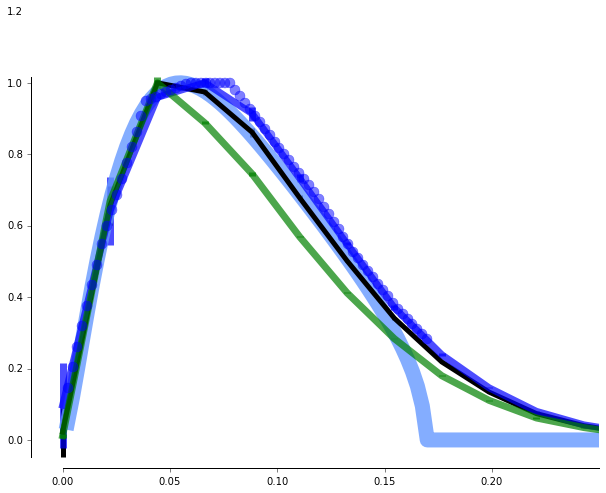

In [564]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='#6699ff', linewidth=15, alpha=0.8)
plt.errorbar(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), yerr=sem(both_ffts/np.nanmax(filt_expt_both)), 
             color='k', linewidth=5, alpha=1.0, capthick=5, capsize=0)
plt.errorbar(freq_expt_a, filt_expt_a/np.nanmax(filt_expt_a), yerr=sem(a_ffts/np.nanmax(filt_expt_a)),
            color='b', alpha=0.7, linewidth=7, capthick=5, capsize=0)
plt.errorbar(freq_expt_h, filt_expt_h/np.nanmax(filt_expt_h), yerr=sem(h_ffts/np.nanmax(filt_expt_h)),
            color='g', alpha=0.7, linewidth=7, capthick=5, capsize=0)
plt.plot(a_freqs, a_fft, 'b.', linewidth=2, markersize=20, label='ama only', alpha=0.5)
plt.xlim([-0.01,0.25])
plt.ylim([-0.05, 1.2])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.savefig('Fig4B-C_one_plot.pdf', fonttype=42)

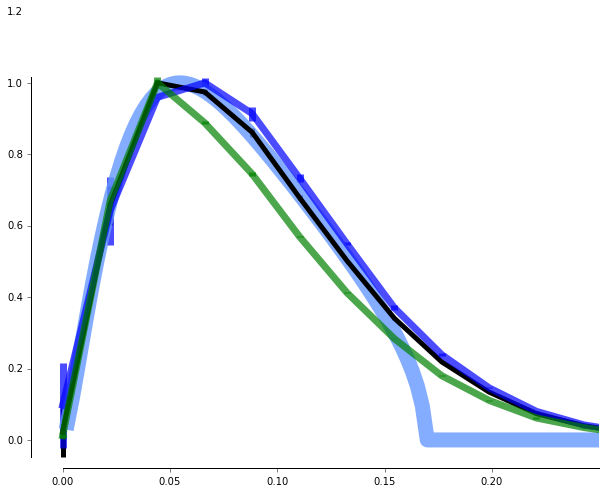

In [565]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='#6699ff', linewidth=15, alpha=0.8)
plt.errorbar(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), yerr=sem(both_ffts/np.nanmax(filt_expt_both)), 
             color='k', linewidth=5, alpha=1.0, capthick=5, capsize=0)
plt.errorbar(freq_expt_a, filt_expt_a/np.nanmax(filt_expt_a), yerr=sem(a_ffts/np.nanmax(filt_expt_a)),
            color='b', alpha=0.7, linewidth=7, capthick=5, capsize=0)
plt.errorbar(freq_expt_h, filt_expt_h/np.nanmax(filt_expt_h), yerr=sem(h_ffts/np.nanmax(filt_expt_h)),
            color='g', alpha=0.7, linewidth=7, capthick=5, capsize=0)
# plt.plot(a_freqs, a_fft, 'b.', linewidth=2, markersize=20, label='ama only', alpha=0.5)
plt.xlim([-0.01,0.25])
plt.ylim([-0.05, 1.2])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.savefig('Fig4B-C_one_plot.pdf', fonttype=42)

## Now control for variance

In [761]:
init_model_const = 0.927
init_a_const = 1.02
init_h_const = 0.81

In [762]:
ideal_filter_interp = interp1d(freq_ideal, filt_ideal/np.nanmax(filt_ideal), kind='slinear')
output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(output_variance)

902.480678788


In [763]:
model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

def constrain_model_var(model_const):
    output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    
    return (output_variance - model_variance)**2

In [764]:
model_const_opt = scipy.optimize.minimize(constrain_model_var, init_model_const)
model_const = model_const_opt['x']
model_const_opt

      fun: 4.452907817053672e-14
 hess_inv: array([[ 0.01631523]])
      jac: array([  2.79567053e-06])
  message: 'Optimization terminated successfully.'
     nfev: 12
      nit: 2
     njev: 4
   status: 0
  success: True
        x: array([ 0.92797615])

In [765]:
model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(model_variance)

902.480678999


In [766]:
a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

def constrain_a_var(a_const):
    output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    
    return (output_variance - a_variance)**2

In [767]:
a_const_opt = scipy.optimize.minimize(constrain_a_var, init_a_const)
a_const = a_const_opt['x']
a_const_opt

      fun: 1.1135142273899948e-15
 hess_inv: array([[ 0.00912662]])
      jac: array([  3.22683537e-07])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 4
     njev: 11
   status: 0
  success: True
        x: array([ 0.69443606])

In [768]:
a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(a_variance)

902.480678755


In [769]:
h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

def constrain_h_var(h_const):
    output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    
    return (output_variance - h_variance)**2

In [770]:
h_const_opt = scipy.optimize.minimize(constrain_h_var, init_h_const)
h_const = h_const_opt['x']
h_const_opt

      fun: 5.184364622138605e-16
 hess_inv: array([[ 0.01743469]])
      jac: array([  1.83663305e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([ 0.95976573])

In [771]:
h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(h_variance)

902.480678765


## Now look at infos

In [594]:
cuminfo_ideal = info_at_freq(lower_freqs, lower_amps, ideal_filter_interp)
cuminfo_model = info_at_freq(lower_freqs, lower_amps, model_interp, function_const=model_const)
cuminfo_a = info_at_freq(lower_freqs, lower_amps, a_interp, function_const=a_const)
cuminfo_h = info_at_freq(lower_freqs, lower_amps, h_interp, function_const=h_const)

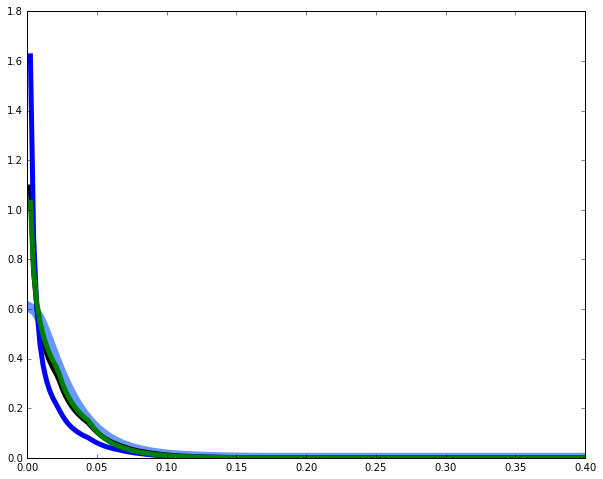

In [595]:
plt.plot(lower_freqs, cuminfo_ideal, color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, cuminfo_model, color='k', linewidth=5, label='model')
plt.plot(lower_freqs, cuminfo_a, color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, cuminfo_h, color='g', linewidth=5, label='horizontal')

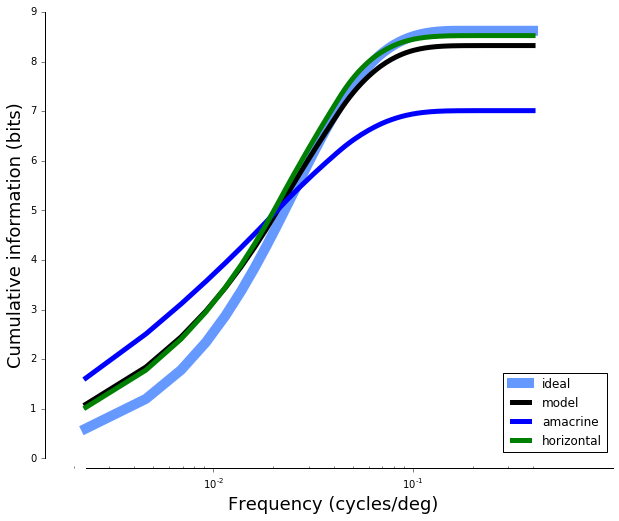

In [596]:
plt.plot(lower_freqs, np.cumsum(cuminfo_ideal), color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, np.cumsum(cuminfo_model), color='k', linewidth=5, label='model')
plt.plot(lower_freqs, np.cumsum(cuminfo_a), color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, np.cumsum(cuminfo_h), color='g', linewidth=5, label='horizontal')
plt.xlabel('Frequency (cycles/deg)', fontsize=18)
plt.ylabel('Cumulative information (bits)', fontsize=18)
plt.legend(loc='lower right')
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
plt.xscale('log')
plt.xlim([1.6*10e-4, 10e-1])
adjust_spines(plt.gca(), ['left', 'bottom'])

# The problem is MSE difference for low frequencies $\neq$ information difference

In [653]:
lowerer_freqs = [f for f in lower_freqs if f < 0.05]
freqs, model_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), returnFlag='all')
model_interp, model_popt = fit_ideal(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=1.751050, returnFlag='interp')
print(model_popt)
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


[  7.98961117e-01  -7.87369533e-05   5.72198810e+00   4.68015029e-01]
Horizontal weight is 0.479802, Amacrine weight is 0.533085
Center weight is 6.485904, Surround weight is 0.414787
Center is 2.234066 std wide


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


(0, 0.4)

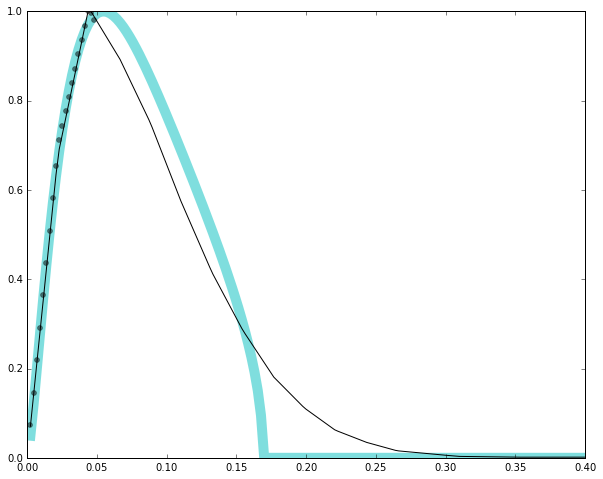

In [654]:
model_filter_interp = filter_model(*model_popt)
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(freqs, model_fft, 'k.', linewidth=2, markersize=10, alpha=0.5)
plt.plot(lower_freqs, model_filter_interp(lower_freqs)/np.nanmax(model_filter_interp(lower_freqs)), 'k')
plt.xlim([0,.4])

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.47596914806e-07.


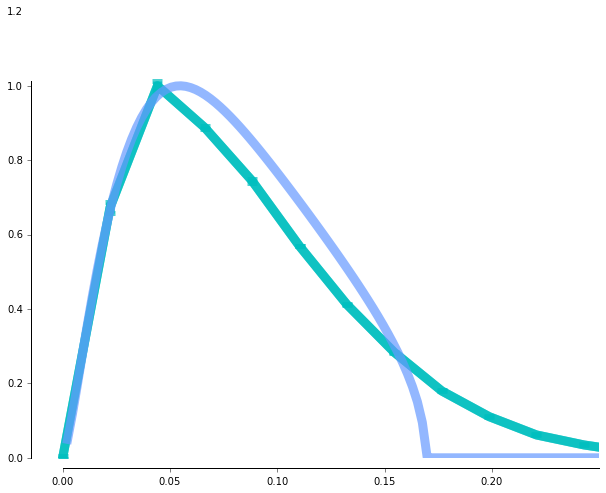

In [655]:
center_width = 1.751050
horz_weight, ama_weight, center_weight, surround_weight = model_popt
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=center_weight, surround_weighting=surround_weight,
                                                                     horz_weighting=horz_weight, ama_weighting=ama_weight,
                                                                     center_width=center_width,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                                       statistics=True)

In [656]:
model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

def constrain_model_var(model_const):
    output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    
    return (output_variance - model_variance)**2

In [657]:
model_const_opt = scipy.optimize.minimize(constrain_model_var, init_model_const)
model_const = model_const_opt['x']
model_const_opt

      fun: 1.3652129983881999e-14
 hess_inv: array([[ 0.01835068]])
      jac: array([ -8.13529268e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.98559161])

In [772]:
cuminfo_ideal = info_at_freq(lower_freqs, lower_amps, ideal_filter_interp)
cuminfo_model = info_at_freq(lower_freqs, lower_amps, model_interp, function_const=model_const)
cuminfo_a = info_at_freq(lower_freqs, lower_amps, a_interp, function_const=a_const)
cuminfo_h = info_at_freq(lower_freqs, lower_amps, h_interp, function_const=h_const)

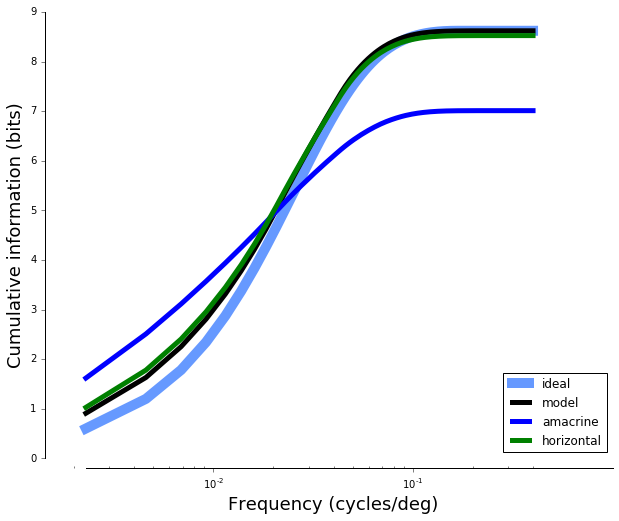

In [659]:
plt.plot(lower_freqs, np.cumsum(cuminfo_ideal), color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, np.cumsum(cuminfo_model), color='k', linewidth=5, label='model')
plt.plot(lower_freqs, np.cumsum(cuminfo_a), color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, np.cumsum(cuminfo_h), color='g', linewidth=5, label='horizontal')
plt.xlabel('Frequency (cycles/deg)', fontsize=18)
plt.ylabel('Cumulative information (bits)', fontsize=18)
plt.legend(loc='lower right')
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
plt.xscale('log')
plt.xlim([1.6*10e-4, 10e-1])
adjust_spines(plt.gca(), ['left', 'bottom'])

In [641]:
def max_info(cutoff_freq):
    lowerer_freqs = [f for f in lower_freqs if f < cutoff_freq]
    freqs, model_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(lowerer_freqs, 
                                                                                                        ideal_filter_interp(lowerer_freqs), returnFlag='all')
    model_interp, model_popt = fit_ideal(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=1.751050, returnFlag='interp')
    model_filter_interp = filter_model(*model_popt)
    
    center_width = 1.751050
    horz_weight, ama_weight, center_weight, surround_weight = model_popt
    freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                         inputNoise=0.12, outputNoise=0.35,
                                                                         center_weighting=center_weight, surround_weighting=surround_weight,
                                                                         horz_weighting=horz_weight, ama_weighting=ama_weight,
                                                                         center_width=center_width,
                                                                         returnFlag=True, xlimit=[-0.01,0.25], 
                                                                         numPoints=10000, plotFlag='aggregate',
                                                                                           statistics=True)
    
    model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

    def constrain_model_var(model_const):
        output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                              (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                              (output_noise)**2)
        model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                              (input_noise * model_const * model_interp(more_signal_freq))**2 +
                              (output_noise)**2)

        return (output_variance - model_variance)**2
    
    model_const_opt = scipy.optimize.minimize(constrain_model_var, init_model_const)
    model_const = model_const_opt['x']
    
    cuminfo_model = info_at_freq(lower_freqs, lower_amps, model_interp, function_const=model_const)
    
    return -np.sum(cuminfo_model)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer

The relative error from this choice of Lagrangian multiplier is 3.11185615882e-07.
The relative error from this choice of Lagrangian multiplier is 1.40257155429e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 1.30126001714e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


ValueError: zero-size array to reduction operation fmax which has no identity

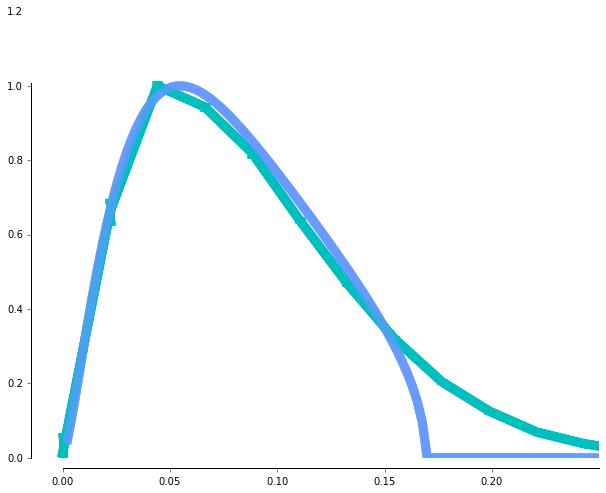

In [643]:
cutoff_freq_opt = scipy.optimize.minimize(max_info, 0.3)

In [644]:
cutoff_freq_opt

      fun: -1.204873576465237e-09
 hess_inv: array([[1]])
      jac: array([  2.21427663e-06])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 0.3])

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer

The relative error from this choice of Lagrangian multiplier is 1.57379086071e-07.
The relative error from this choice of Lagrangian multiplier is 1.69992346948e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 2.52596694175e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 5.00238259904e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 6.51118209941e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 2.59258925845e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 1.99042444402e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 1.99308853857e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 1.52000117472e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 4.56854402473e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 1.71772237799e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 7.36317243035e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 1.83788817613e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 2.07704637972e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 5.61326011003e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 4.19402442539e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 4.88781896476e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 1.88924548762e-07.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 6.24753458035e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will 


The relative error from this choice of Lagrangian multiplier is 4.87487832123e-08.

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


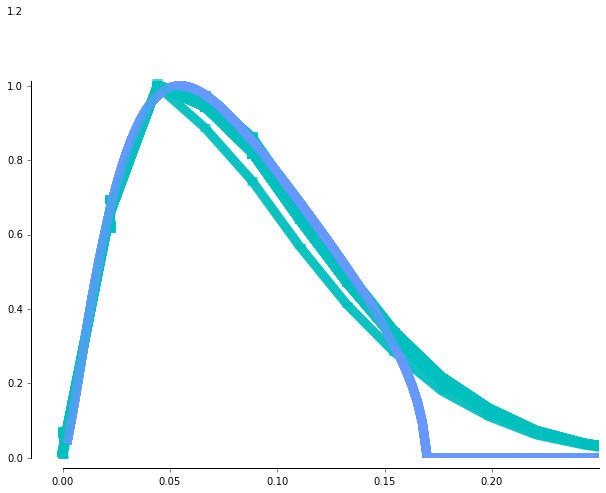

In [650]:
infos_vs_cutoff = [max_info(c) for c in np.linspace(0.05,0.35, 20)]

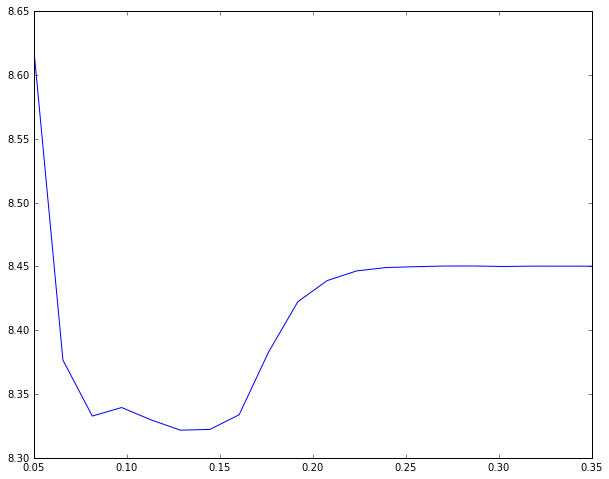

In [651]:
plt.plot(np.linspace(0.05,0.35, 20), -np.array(infos_vs_cutoff))

In [652]:
infos_vs_cutoff

[-8.6226945885009858,
 -8.3765957978079282,
 -8.3327197076979065,
 -8.3394124216672463,
 -8.3297321223384841,
 -8.3216816808008733,
 -8.3222265032390084,
 -8.3337497110235113,
 -8.3828525245536394,
 -8.4224187597615803,
 -8.4389573198151666,
 -8.4465204109097538,
 -8.4491658796336626,
 -8.4498367506628966,
 -8.4503647572998695,
 -8.4503809869839035,
 -8.4500029521099052,
 -8.4502814448243786,
 -8.4502673596229556,
 -8.4502344971563428]

# The problem is that you are penalized harshly for any power over ~0.17 cycles/deg where noise > signal. This is because you are allocating output variance to noise vs signal. So the highest information filters are actually really just minimizing their amplitude past the 0.17 point.

In [969]:
cutoff = 0.25
center_width = 1.4745 #1.751050

In [975]:
lowerer_freqs = [f for f in lower_freqs if f < cutoff]
model_freqs, model_fft, horz_weight, ama_weight, center_weight, surround_weight, center_width = fit_ideal(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs),
                                                                                                    center_width=center_width,
                                                                                                    returnFlag='all')
model_interp, model_popt = fit_ideal(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=center_width, returnFlag='interp')
print(model_popt)
print('Horizontal weight is %f, Amacrine weight is %f' %(horz_weight, ama_weight))
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


[ 1.52295801 -0.48467074  7.88516535  0.49705113]
Horizontal weight is 1.522958, Amacrine weight is -0.484671
Center weight is 7.885165, Surround weight is 0.497051
Center is 1.474500 std wide


/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:37: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:642: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


(0, 0.4)

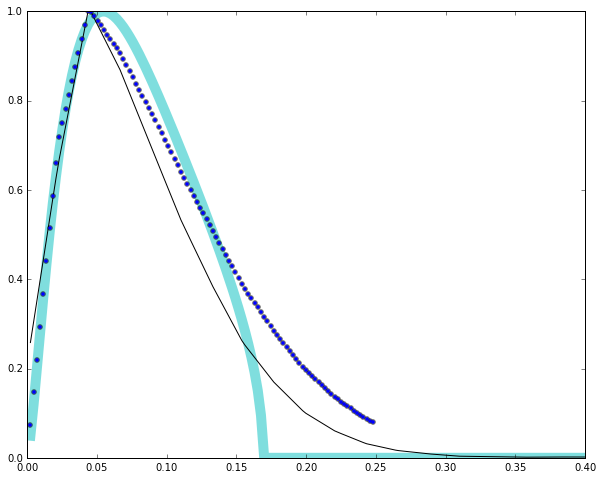

In [976]:
model_filter_interp = filter_model(*model_popt)
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5)
plt.plot(model_freqs, model_fft, 'k.', linewidth=2, markersize=10, alpha=0.5)
plt.plot(lower_freqs, model_filter_interp(lower_freqs)/np.nanmax(model_filter_interp(lower_freqs)), 'k')
plt.plot(model_freqs, model_interp(model_freqs, *model_popt), 'b.')
plt.xlim([0,.4])

In [977]:
lowerer_freqs = [f for f in lower_freqs if f < cutoff]
h_freqs, h_fft, center_weight, surround_weight, center_width = fit_ideal_horz_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), 
                                                                                                    center_width=center_width,
                                                                                                    returnFlag='all')
h_interp, h_popt = fit_ideal_horz_only(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=center_width, returnFlag='interp')
print(h_popt)
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

[ 0.95658616  0.07186643]
Center weight is 0.956586, Surround weight is 0.071866
Center is 1.474500 std wide


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:706: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:706: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


In [978]:
lowerer_freqs = [f for f in lower_freqs if f < cutoff]
a_freqs, a_fft, center_weight, surround_weight, center_width = fit_ideal_ama_only(lowerer_freqs, 
                                                                                                    ideal_filter_interp(lowerer_freqs), 
                                                                                                    center_width=center_width,
                                                                                                    returnFlag='all')
a_interp, a_popt = fit_ideal_ama_only(lowerer_freqs, ideal_filter_interp(lowerer_freqs), center_width=center_width, returnFlag='interp')
print(a_popt)
print('Center weight is %f, Surround weight is %f' %(center_weight, surround_weight))
print('Center is %f std wide' %center_width)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:770: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:770: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]


[ 3.48251069  0.38355979]
Center weight is 84.235952, Surround weight is 9.277648
Center is 1.474500 std wide


(0, 1.1)

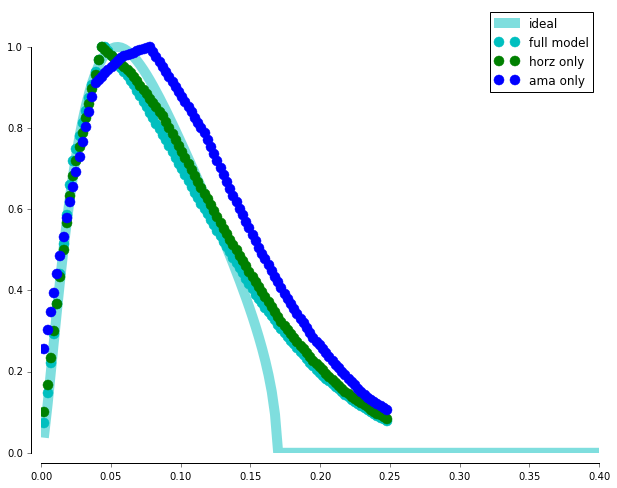

In [979]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='c', linewidth=10, alpha=0.5, label='ideal')
plt.plot(model_freqs, model_fft, 'c.', linewidth=2, markersize=20, label='full model')
plt.plot(h_freqs, h_fft, 'g.', linewidth=2, markersize=20, label='horz only')
plt.plot(a_freqs, a_fft, 'b.', linewidth=2, markersize=20, label='ama only')
plt.xlim([0,.4])
plt.legend()
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.ylim([0,1.1])

The relative error from this choice of Lagrangian multiplier is 3.09461787754e-08.


/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


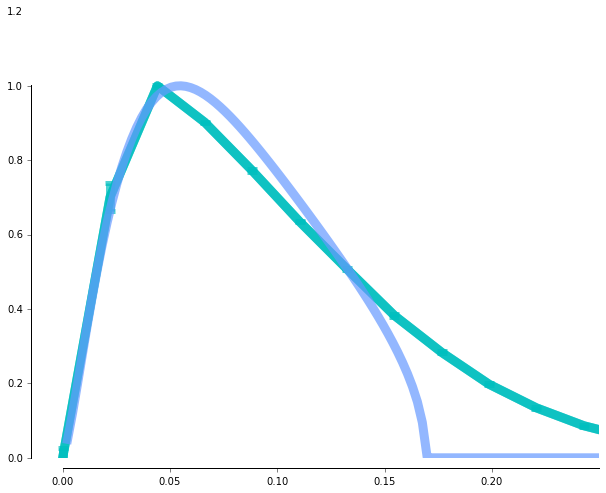

In [980]:
horz_weight, ama_weight, center_weight, surround_weight = model_popt
freq_ideal, filt_ideal, freq_expt_both, filt_expt_both, both_freqs, both_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=center_weight, surround_weighting=surround_weight,
                                                                     horz_weighting=horz_weight, ama_weighting=ama_weight,
                                                                     center_width=center_width,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                                       statistics=True)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 1.46125604803e-07.


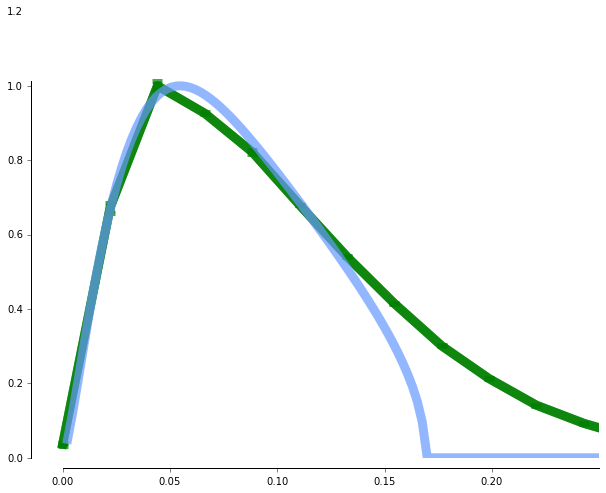

In [981]:
horz_weight = 1.0
ama_weight = 0.0
center_weight, surround_weight = h_popt
freq_ideal, filt_ideal, freq_expt_h, filt_expt_h, h_freqs, h_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=center_weight, surround_weighting=surround_weight,
                                                                     horz_weighting=1.0, ama_weighting=0.0,
                                                                     center_width=center_width,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                     aggregateColor='g', statistics=True)

/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:111: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
/Users/lmcintosh/code/surround-size/atick_redlich_functions.py:174: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rf_ffts.append(two_sided[:n/2 + 1])


The relative error from this choice of Lagrangian multiplier is 5.00125851937e-08.


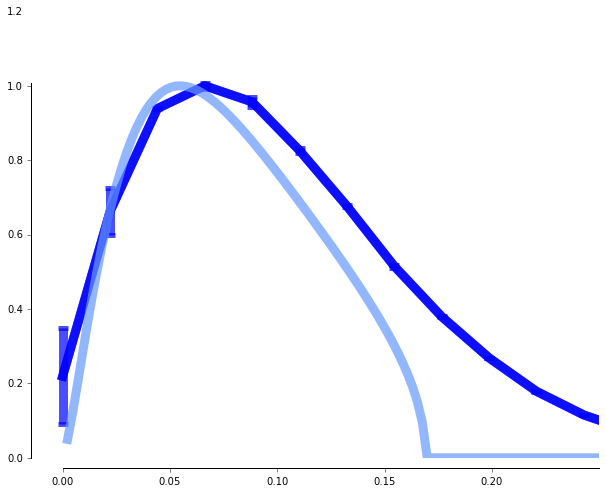

In [982]:
horz_weight = 0.0
ama_weight = 1.0
center_weight, surround_weight = a_popt
freq_ideal, filt_ideal, freq_expt_a, filt_expt_a, a_freqs, a_ffts = compare_to_experiment(originalFreqs, originalSpectra**2, 
                                                                     inputNoise=0.12, outputNoise=0.35,
                                                                     center_weighting=center_weight, surround_weighting=surround_weight,
                                                                     horz_weighting=horz_weight, ama_weighting=ama_weight,
                                                                     center_width=center_width,
                                                                     returnFlag=True, xlimit=[-0.01,0.25], 
                                                                     numPoints=10000, plotFlag='aggregate',
                                                                     aggregateColor='b', statistics=True)

In [983]:
np.max(lowerer_freqs)

0.24793193605074795

In [984]:
input_noise = 0.12
output_noise = 0.35

In [985]:
model_interp = interp1d(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

signal_interp = interp1d(more_signal_freq, more_signal_amp, kind='slinear')

def constrain_model_var(model_const):
    output_variance = np.sum((signal_interp(lower_freqs)*ideal_filter_interp(lower_freqs))**2 +
                          (input_noise * ideal_filter_interp(lower_freqs))**2 +
                          (output_noise)**2)
    model_variance = np.sum((signal_interp(lower_freqs)*model_const*model_interp(lower_freqs))**2 +
                          (input_noise * model_const * model_interp(lower_freqs))**2 +
                          (output_noise)**2)
    
    return (output_variance - model_variance)**2

In [986]:
model_const_opt = scipy.optimize.minimize(constrain_model_var, init_model_const)
model_const = model_const_opt['x']
model_const_opt

      fun: 1.6497190067396029e-15
 hess_inv: array([[ 0.01699262]])
      jac: array([ -2.21361414e-09])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.94787328])

In [987]:
model_variance = np.sum((more_signal_amp*model_const*model_interp(more_signal_freq))**2 +
                          (input_noise * model_const * model_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(model_variance)

1227.44818201


In [988]:
a_interp = interp1d(freq_expt_both, filt_expt_a/np.nanmax(filt_expt_a), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

def constrain_a_var(a_const):
    output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    
    return (output_variance - a_variance)**2

In [989]:
a_const_opt = scipy.optimize.minimize(constrain_a_var, init_a_const)
a_const = a_const_opt['x']
a_const_opt

      fun: 4.935037984507453e-15
 hess_inv: array([[ 0.00559907]])
      jac: array([  3.04050079e-09])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 5
     njev: 13
   status: 0
  success: True
        x: array([ 0.5440388])

In [990]:
a_variance = np.sum((more_signal_amp*a_const*a_interp(more_signal_freq))**2 +
                          (input_noise * a_const * a_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(a_variance)

1227.44817872


In [991]:
h_interp = interp1d(freq_expt_both, filt_expt_h/np.nanmax(filt_expt_h), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

def constrain_h_var(h_const):
    output_variance = np.sum((more_signal_amp*ideal_filter_interp(more_signal_freq))**2 +
                          (input_noise * ideal_filter_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
    
    return (output_variance - h_variance)**2

In [992]:
h_const_opt = scipy.optimize.minimize(constrain_h_var, init_h_const)
h_const = h_const_opt['x']
h_const_opt

      fun: 8.870159934580023e-14
 hess_inv: array([[ 0.01457157]])
      jac: array([ -2.97533105e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 0.87861705])

In [993]:
h_variance = np.sum((more_signal_amp*h_const*h_interp(more_signal_freq))**2 +
                          (input_noise * h_const * h_interp(more_signal_freq))**2 +
                          (output_noise)**2)
print(h_variance)

1227.44817849


In [994]:
cuminfo_ideal = info_at_freq(lower_freqs, lower_amps, ideal_filter_interp, output_noise=output_noise, input_noise=input_noise)
cuminfo_model = info_at_freq(lower_freqs, lower_amps, model_interp, function_const=model_const, output_noise=output_noise, input_noise=input_noise)
cuminfo_a = info_at_freq(lower_freqs, lower_amps, a_interp, function_const=a_const, output_noise=output_noise, input_noise=input_noise)
cuminfo_h = info_at_freq(lower_freqs, lower_amps, h_interp, function_const=h_const, output_noise=output_noise, input_noise=input_noise)

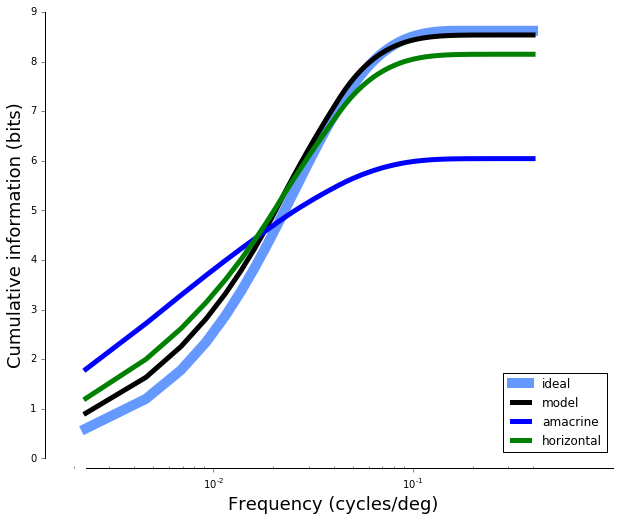

In [995]:
plt.plot(lower_freqs, np.cumsum(cuminfo_ideal), color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, np.cumsum(cuminfo_model), color='k', linewidth=5, label='model')
plt.plot(lower_freqs, np.cumsum(cuminfo_a), color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, np.cumsum(cuminfo_h), color='g', linewidth=5, label='horizontal')
plt.xlabel('Frequency (cycles/deg)', fontsize=18)
plt.ylabel('Cumulative information (bits)', fontsize=18)
plt.legend(loc='lower right')
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
plt.xscale('log')
plt.xlim([1.6*10e-4, 10e-1])
adjust_spines(plt.gca(), ['left', 'bottom'])

In [721]:
np.sqrt(np.sum(((signal_interp(lower_freqs)*model_const*model_interp(lower_freqs))**2)/((input_noise*model_const*model_interp(lower_freqs))**2 + output_noise**2)))

4.7438216119949956

In [723]:
np.sqrt(np.sum(((signal_interp(more_signal_freq)*model_const*model_interp(more_signal_freq))**2)/((input_noise*model_const*model_interp(more_signal_freq))**2 + output_noise**2)))

4.7438216205026071

In [725]:
np.sqrt(np.sum(((signal_interp(more_signal_freq)*ideal_filter_interp(more_signal_freq))**2)/((input_noise*ideal_filter_interp(more_signal_freq))**2 + output_noise**2)))

4.6156529958046004

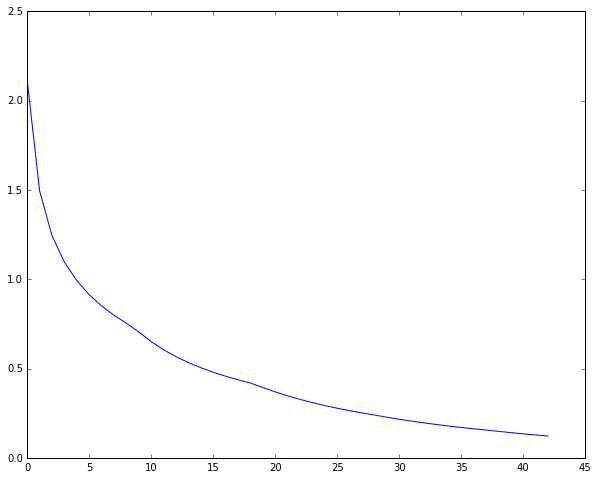

In [719]:
plt.plot((signal_interp(lowerer_freqs)*model_const*model_interp(lowerer_freqs))/(input_noise*model_const*model_interp(lowerer_freqs) + output_noise))

## How much information do ganglion cell RFs transmit?

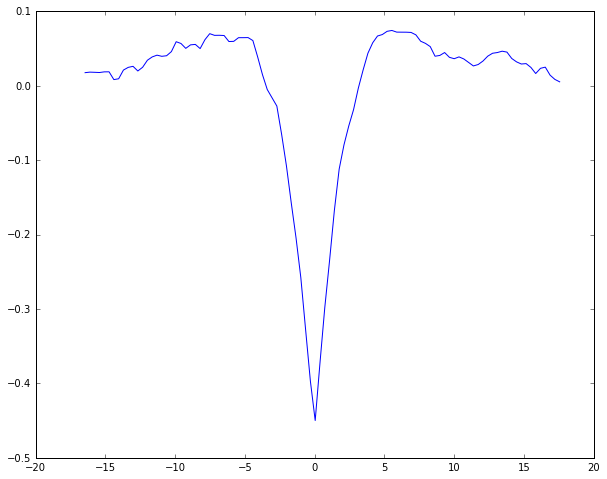

In [757]:
aligned_space = valid_space - 0.25
plt.plot(aligned_space, mean_ganglion-np.mean(mean_ganglion))

In [745]:
rf_f_two_sided = abs(np.fft.fft(mean_ganglion-np.mean(mean_ganglion))) / np.prod(mean_ganglion.shape)
n = len(rf_f_two_sided)
if n % 2 == 0:
    rf_f_one_sided = rf_f_two_sided[:n/2 + 1]
else:
    rf_f_one_sided = rf_f_two_sided[:(n-1)/2 + 1]
spacing = aligned_space[-1] - aligned_space[-2]
rf_freqs_one_sided = np.linspace(0, 1./(2*spacing), len(rf_f_one_sided))

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:4: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


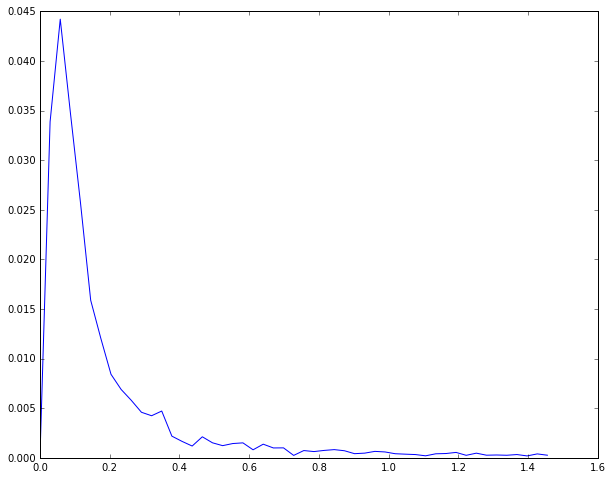

In [746]:
plt.plot(rf_freqs_one_sided, rf_f_one_sided)

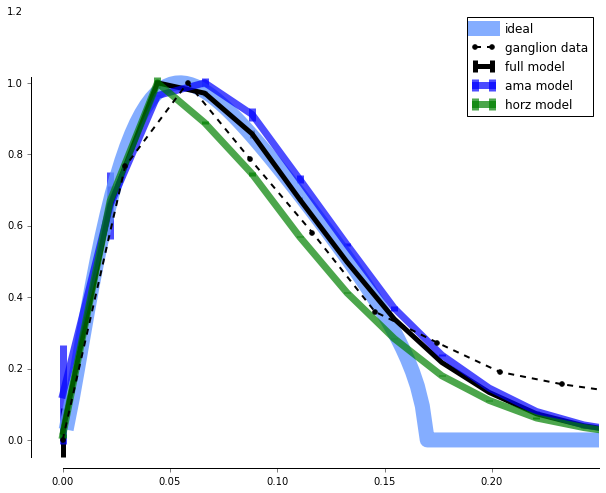

In [747]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='#6699ff', linewidth=15, alpha=0.8, label='ideal')
plt.errorbar(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), yerr=sem(both_ffts/np.nanmax(filt_expt_both)), 
             color='k', linewidth=5, alpha=1.0, capthick=5, capsize=0, label='full model')
plt.errorbar(freq_expt_a, filt_expt_a/np.nanmax(filt_expt_a), yerr=sem(a_ffts/np.nanmax(filt_expt_a)),
            color='b', alpha=0.7, linewidth=7, capthick=5, capsize=0, label='ama model')
plt.errorbar(freq_expt_h, filt_expt_h/np.nanmax(filt_expt_h), yerr=sem(h_ffts/np.nanmax(filt_expt_h)),
            color='g', alpha=0.7, linewidth=7, capthick=5, capsize=0, label='horz model')
plt.plot(rf_freqs_one_sided, rf_f_one_sided/np.nanmax(rf_f_one_sided), 'k.--', markersize=10, linewidth=2, label='ganglion data')
# plt.plot(a_freqs, a_fft, 'b.', linewidth=2, markersize=20, label='ama only', alpha=0.5)
plt.xlim([-0.01,0.25])
plt.ylim([-0.05, 1.2])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend()
# plt.savefig('Fig4B-C_one_plot.pdf', fonttype=42)

In [997]:
ganglion_interp = interp1d(rf_freqs_one_sided, rf_f_one_sided/np.nanmax(rf_f_one_sided), kind='slinear', 
                        fill_value=[0.0], bounds_error=False)

signal_interp = interp1d(more_signal_freq, more_signal_amp, kind='slinear')

def constrain_ganglion_var(ganglion_const):
    output_variance = np.sum((signal_interp(lower_freqs)*ideal_filter_interp(lower_freqs))**2 +
                          (input_noise * ideal_filter_interp(lower_freqs))**2 +
                          (output_noise)**2)
    ganglion_variance = np.sum((signal_interp(lower_freqs)*ganglion_const*ganglion_interp(lower_freqs))**2 +
                          (input_noise * ganglion_const * ganglion_interp(lower_freqs))**2 +
                          (output_noise)**2)
    
    return (output_variance - ganglion_variance)**2

In [998]:
init_ganglion_const = 1.02

In [999]:
ganglion_const_opt = scipy.optimize.minimize(constrain_ganglion_var, init_ganglion_const)
ganglion_const = ganglion_const_opt['x']
ganglion_const_opt

      fun: 2.436293564227542e-15
 hess_inv: array([[ 0.02142732]])
      jac: array([ -1.29220300e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([ 1.06466676])

In [1000]:
cuminfo_ganglion = info_at_freq(lower_freqs, lower_amps, ganglion_interp, function_const=ganglion_const, output_noise=output_noise, input_noise=input_noise)

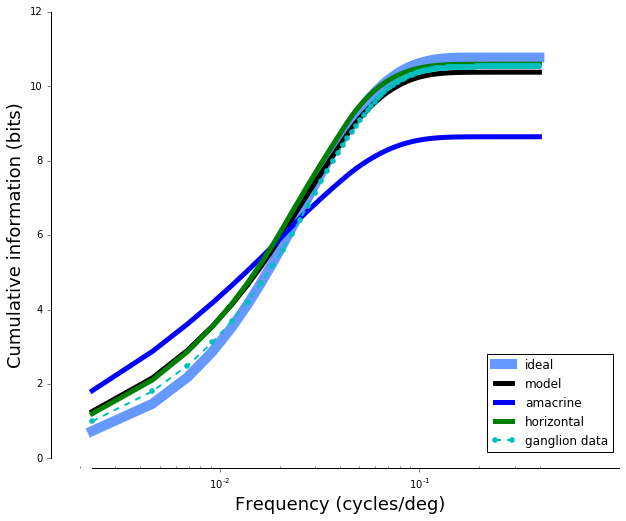

In [800]:
plt.plot(lower_freqs, np.cumsum(cuminfo_ideal), color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, np.cumsum(cuminfo_model), color='k', linewidth=5, label='model')
plt.plot(lower_freqs, np.cumsum(cuminfo_a), color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, np.cumsum(cuminfo_h), color='g', linewidth=5, label='horizontal')
plt.plot(lower_freqs, np.cumsum(cuminfo_ganglion), 'c.--', linewidth=2, markersize=10, label='ganglion data')
plt.xlabel('Frequency (cycles/deg)', fontsize=18)
plt.ylabel('Cumulative information (bits)', fontsize=18)
plt.legend(loc='lower right')
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
plt.xscale('log')
plt.xlim([1.6*10e-4, 10e-1])
adjust_spines(plt.gca(), ['left', 'bottom'])

In [801]:
np.sum(cuminfo_ganglion)

10.542525066109743

In [802]:
np.sum(cuminfo_ideal)

10.777159503653518

In [803]:
np.sum(cuminfo_ganglion)/np.sum(cuminfo_ideal)

0.97822854552127281

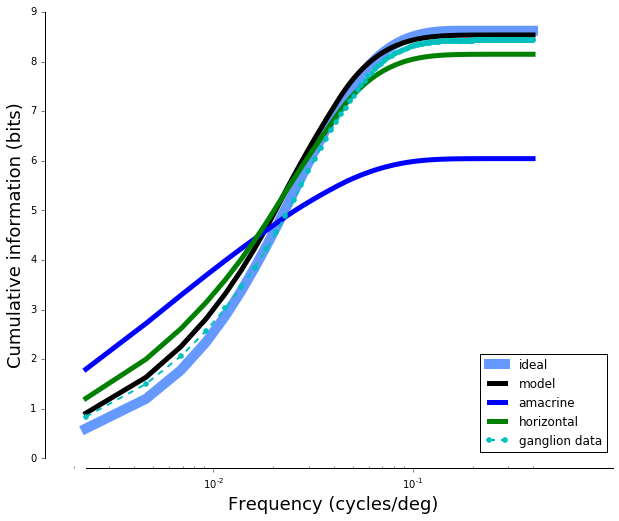

In [1001]:
plt.plot(lower_freqs, np.cumsum(cuminfo_ideal), color='#6699ff', linewidth=10, label='ideal')
plt.plot(lower_freqs, np.cumsum(cuminfo_model), color='k', linewidth=5, label='model')
plt.plot(lower_freqs, np.cumsum(cuminfo_a), color='b', linewidth=5, label='amacrine')
plt.plot(lower_freqs, np.cumsum(cuminfo_h), color='g', linewidth=5, label='horizontal')
plt.plot(lower_freqs, np.cumsum(cuminfo_ganglion), 'c.--', linewidth=2, markersize=10, label='ganglion data')
plt.xlabel('Frequency (cycles/deg)', fontsize=18)
plt.ylabel('Cumulative information (bits)', fontsize=18)
plt.legend(loc='lower right')
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
plt.xscale('log')
plt.xlim([1.6*10e-4, 10e-1])
adjust_spines(plt.gca(), ['left', 'bottom'])

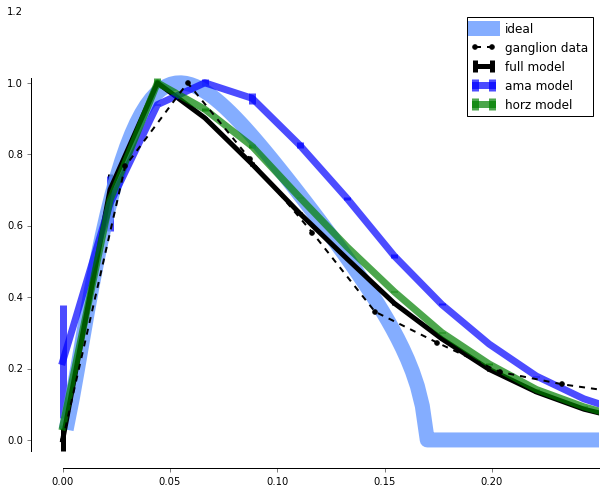

In [1002]:
plt.plot(freq_ideal, filt_ideal/np.nanmax(filt_ideal), color='#6699ff', linewidth=15, alpha=0.8, label='ideal')
plt.errorbar(freq_expt_both, filt_expt_both/np.nanmax(filt_expt_both), yerr=sem(both_ffts/np.nanmax(filt_expt_both)), 
             color='k', linewidth=5, alpha=1.0, capthick=5, capsize=0, label='full model')
plt.errorbar(freq_expt_a, filt_expt_a/np.nanmax(filt_expt_a), yerr=sem(a_ffts/np.nanmax(filt_expt_a)),
            color='b', alpha=0.7, linewidth=7, capthick=5, capsize=0, label='ama model')
plt.errorbar(freq_expt_h, filt_expt_h/np.nanmax(filt_expt_h), yerr=sem(h_ffts/np.nanmax(filt_expt_h)),
            color='g', alpha=0.7, linewidth=7, capthick=5, capsize=0, label='horz model')
plt.plot(rf_freqs_one_sided, rf_f_one_sided/np.nanmax(rf_f_one_sided), 'k.--', markersize=10, linewidth=2, label='ganglion data')
# plt.plot(a_freqs, a_fft, 'b.', linewidth=2, markersize=20, label='ama only', alpha=0.5)
plt.xlim([-0.01,0.25])
plt.ylim([-0.05, 1.2])
plt.tick_params(axis='y', direction='out')
plt.tick_params(axis='x', direction='out')
adjust_spines(plt.gca(), ['left', 'bottom'])
plt.legend()
# plt.savefig('Fig4B-C_one_plot.pdf', fonttype=42)